<a href="https://colab.research.google.com/github/kamalsidhu224/Master-s-Project/blob/main/Air_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('.\sql_db\AirQualityPrediction.db')
cur = conn.cursor()

# Data Loading


In [ ]:
# read excel file to insert into table columns
Air_Pollutants = pd.read_excel('/content/Raw_Data (3).xlsx')
Air_Pollutants.to_sql('Air_Pollutants',conn,if_exists='replace',index=False)
conn.commit()

# Data Description

In [ ]:
Air_Pollutants


Date   State      City              Monitoring Station  \
0     2019-01-01  Punjab  Amritsar  Golden Temple, Amritsar - PPCB   
1     2019-01-02  Punjab  Amritsar  Golden Temple, Amritsar - PPCB   
2     2019-01-03  Punjab  Amritsar  Golden Temple, Amritsar - PPCB   
3     2019-01-04  Punjab  Amritsar  Golden Temple, Amritsar - PPCB   
4     2019-01-05  Punjab  Amritsar  Golden Temple, Amritsar - PPCB   
...          ...     ...       ...                             ...   
38272 2023-10-11   Delhi     Delhi                     Delhi, DPCB   
38273 2023-10-12   Delhi     Delhi                     Delhi, DPCB   
38274 2023-10-13   Delhi     Delhi                     Delhi, DPCB   
38275 2023-10-14   Delhi     Delhi                     Delhi, DPCB   
38276 2023-10-15   Delhi     Delhi                     Delhi, DPCB   

       PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)   NOx (ppb)  \
0          91.570000    203.600000   22.430000    20.930000   43.770000   
1          74.460000    171.780000   40.650000    21.020000   57.360000   
2          44.130000     97.990000   31.130000    27.790000   59.090000   
3          34.800000     77.260000   29.940000    32.320000   62.250000   
4          26.740000     59.370000   26.500000    29.090000   55.510000   
...              ...           ...         ...          ...         ...   
38272      85.398500    191.266500   21.390000    34.381500   44.805500   
38273     116.253500    244.066000   32.976000    43.017000   62.555500   
38274     133.343529    301.104118   37.158824    50.130588   70.611765   
38275     109.264118    268.819412   53.785882    43.270588   79.911765   
38276     140.915294    350.900000  140.623529    43.189412  156.324118   

       NH3 (ug/m3)  ...  CO (mg/m3)  Ozone (ug/m3)  Benzene (ug/m3)  \
0         6.600000  ...    0.150000       9.920000         7.600000   
1         9.830000  ...    0.050000       5.890000         5.640000   
2         9.180000  ...    0.010000       5.610000         6.530000   
3         9.370000  ...    0.000000       5.180000         6.910000   
4         8.300000  ...    0.000000       5.020000         7.440000   
...            ...  ...         ...            ...              ...   
38272    32.099375  ...    1.043000      23.322000         0.658182   
38273    33.511250  ...    1.249500      26.042000         0.844545   
38274    35.227500  ...    1.285294      31.970000         0.941111   
38275    37.143125  ...    1.361765      29.060000         0.880000   
38276    40.662500  ...    2.038750       8.820588         1.687500   

       Toluene (ug/m3)  Temp (degree C)     RH (%)  WS (m/s)    WD (deg)  \
0             2.770000            14.54  78.270000  1.200000  186.110000   
1             2.870000            13.59  87.870000  1.330000  237.410000   
2             2.400000            12.76  68.570000  1.210000  279.660000   
3             1.740000            13.89  71.190000  1.240000  258.900000   
4             1.540000            12.89  86.100000  1.870000  131.500000   
...                ...              ...        ...       ...         ...   
38272         5.026667              NaN  60.557333  0.765294  199.431667   
38273         6.074000              NaN  61.693333  0.577647  183.937500   
38274         9.909231              NaN  60.975385  0.572667  182.416000   
38275         8.771538              NaN  60.923846  0.562000  183.289000   
38276        15.375000              NaN  70.746154  0.340000  230.430000   

       SR (W/mt2)  Xylene (ug/m3)  
0        238.6600           6.670  
1        197.0500          10.220  
2        222.1200           8.110  
3        239.5000           8.440  
4        209.4200           6.800  
...           ...             ...  
38272    106.6680           0.165  
38273     79.9630           0.205  
38274     90.4650           0.255  
38275    100.1125           0.350  
38276      8.6000           0.750  

[38277 rows x 21 columns]

In [ ]:
Air_Pollutants.dtypes

Date                  datetime64[ns]
State                         object
City                          object
Monitoring Station            object
PM2.5 (ug/m3)                float64
PM10 (ug/m3)                 float64
NO (ug/m3)                   float64
NO2 (ug/m3)                  float64
NOx (ppb)                    float64
NH3 (ug/m3)                  float64
SO2 (ug/m3)                  float64
CO (mg/m3)                   float64
Ozone (ug/m3)                float64
Benzene (ug/m3)              float64
Toluene (ug/m3)              float64
Temp (degree C)              float64
RH (%)                       float64
WS (m/s)                     float64
WD (deg)                     float64
SR (W/mt2)                   float64
Xylene (ug/m3)               float64
dtype: object

In [ ]:
# function to check missing values in data
def missing_values(Air_Pollutants):
        # Total missing values
        mis_val = Air_Pollutants.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * Air_Pollutants.isnull().sum() / len(Air_Pollutants)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(Air_Pollutants.shape[1]) + " columns.\n""There are " + str(mis_val_table_ren_columns.shape[0]) +" columns that have missing values.")


        return mis_val_table_ren_columns.style.background_gradient(cmap='Greens')

In [ ]:
missing_values(Air_Pollutants)

Your selected dataframe has 21 columns.
There are 17 columns that have missing values.


In [ ]:
Air_Pollutants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38277 entries, 0 to 38276
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                38277 non-null  datetime64[ns]
 1   State               38277 non-null  object        
 2   City                38277 non-null  object        
 3   Monitoring Station  38277 non-null  object        
 4   PM2.5 (ug/m3)       37211 non-null  float64       
 5   PM10 (ug/m3)        37485 non-null  float64       
 6   NO (ug/m3)          37089 non-null  float64       
 7   NO2 (ug/m3)         37590 non-null  float64       
 8   NOx (ppb)           37185 non-null  float64       
 9   NH3 (ug/m3)         34000 non-null  float64       
 10  SO2 (ug/m3)         37360 non-null  float64       
 11  CO (mg/m3)          37570 non-null  float64       
 12  Ozone (ug/m3)       34230 non-null  float64       
 13  Benzene (ug/m3)     32061 non-null  float64   

In [ ]:
Air_Pollutants.isna().sum()

Date                      0
State                     0
City                      0
Monitoring Station        0
PM2.5 (ug/m3)          1066
PM10 (ug/m3)            792
NO (ug/m3)             1188
NO2 (ug/m3)             687
NOx (ppb)              1092
NH3 (ug/m3)            4277
SO2 (ug/m3)             917
CO (mg/m3)              707
Ozone (ug/m3)          4047
Benzene (ug/m3)        6216
Toluene (ug/m3)        8944
Temp (degree C)       31746
RH (%)                 8178
WS (m/s)               5377
WD (deg)               8844
SR (W/mt2)             7885
Xylene (ug/m3)        18047
dtype: int64

In [ ]:
# Display the column names
print(list(Air_Pollutants.columns))

['Date', 'State', 'City', 'Monitoring Station', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'Xylene (ug/m3)']


# Handling Missing values

In [ ]:
# Extract the 'Year' and 'Month' from the 'Date' column
Air_Pollutants['Year'] = Air_Pollutants['Date'].dt.year
Air_Pollutants['Month'] = Air_Pollutants['Date'].dt.month
Air_Pollutants['Day'] = Air_Pollutants['Date'].dt.day

In [ ]:
#columns to exclude from filling null values

columns_to_exclude = ['Date','State','City','Monitoring Station','Year','Month','Day']

# Fill null values with the mean of each monitoring station for each month

for column in Air_Pollutants.columns.difference(columns_to_exclude):
    Air_Pollutants[column]=Air_Pollutants[column].fillna(Air_Pollutants.groupby(['Monitoring Station','Year', 'Month'])[column].transform('mean'))


In [ ]:
Air_Pollutants.isna().sum()

Date                      0
State                     0
City                      0
Monitoring Station        0
PM2.5 (ug/m3)           153
PM10 (ug/m3)             31
NO (ug/m3)              360
NO2 (ug/m3)               0
NOx (ppb)               302
NH3 (ug/m3)            3527
SO2 (ug/m3)              30
CO (mg/m3)                0
Ozone (ug/m3)          3435
Benzene (ug/m3)        5321
Toluene (ug/m3)        7998
Temp (degree C)       31649
RH (%)                 6887
WS (m/s)               4336
WD (deg)               7867
SR (W/mt2)             6346
Xylene (ug/m3)        17140
Year                      0
Month                     0
Day                       0
dtype: int64

In [ ]:
Air_Pollutants.to_sql('Polluted_States',conn,if_exists='replace',index=False)

38277

In [ ]:
Result= pd.read_sql(''' SELECT
    Date,"State","City","Monitoring Station", Year, Month,
    SUM(CASE WHEN "PM2.5 (ug/m3)" IS NULL THEN 1 ELSE 0 END) AS "nPM2.5 (ug/m3)",
    SUM(CASE WHEN "PM10 (ug/m3)" IS NULL THEN 1 ELSE 0 END) AS "nPM10 (ug/m3)",
    SUM(CASE WHEN "NO (ug/m3)" IS NULL THEN 1 ELSE 0 END) AS "nNO (ug/m3)",
    SUM(CASE WHEN "NO2 (ug/m3)" IS NULL THEN 1 ELSE 0 END) AS "nNO2 (ug/m3)",
    SUM(CASE WHEN "NOx (ppb)" IS NULL THEN 1 ELSE 0 END) AS "nNOx (ppb)",
    SUM(CASE WHEN "CO (mg/m3)" IS NULL THEN 1 ELSE 0 END) AS "nCO (mg/m3)",
    SUM(CASE WHEN "NH3 (ug/m3)" IS NULL THEN 1 ELSE 0 END) AS "nNH3 (ug/m3)",
    SUM(CASE WHEN "SO2 (ug/m3)" IS NULL THEN 1 ELSE 0 END) AS "nSO2 (ug/m3)",
    SUM(CASE WHEN "Benzene (ug/m3)" IS NULL THEN 1 ELSE 0 END) AS "nBenzene (ug/m3)",
    SUM(CASE WHEN "Toluene (ug/m3)" IS NULL THEN 1 ELSE 0 END) AS "nToluene (ug/m3)"

FROM
    Polluted_States
GROUP BY
    "Monitoring Station", "Year", "Month"
ORDER BY
    "Monitoring Station", "Year", "Month"
''',conn)

# Print the result
Result

Date    State         City  \
0     2019-01-16 00:00:00  Haryana  Bahadurgarh   
1     2019-02-05 00:00:00  Haryana  Bahadurgarh   
2     2019-03-29 00:00:00  Haryana  Bahadurgarh   
3     2019-04-07 00:00:00  Haryana  Bahadurgarh   
4     2019-05-13 00:00:00  Haryana  Bahadurgarh   
...                   ...      ...          ...   
1261  2023-06-06 00:00:00  Haryana        Hisar   
1262  2023-07-21 00:00:00  Haryana        Hisar   
1263  2023-08-07 00:00:00  Haryana        Hisar   
1264  2023-09-13 00:00:00  Haryana        Hisar   
1265  2023-10-13 00:00:00  Haryana        Hisar   

                   Monitoring Station  Year  Month  nPM2.5 (ug/m3)  \
0     Arya Nagar, Bahadurgarh - HSPCB  2019      1               0   
1     Arya Nagar, Bahadurgarh - HSPCB  2019      2               0   
2     Arya Nagar, Bahadurgarh - HSPCB  2019      3               0   
3     Arya Nagar, Bahadurgarh - HSPCB  2019      4               0   
4     Arya Nagar, Bahadurgarh - HSPCB  2019      5               0   
...                               ...   ...    ...             ...   
1261   Urban Estate-II, Hisar - HSPCB  2023      6               0   
1262   Urban Estate-II, Hisar - HSPCB  2023      7               0   
1263   Urban Estate-II, Hisar - HSPCB  2023      8               0   
1264   Urban Estate-II, Hisar - HSPCB  2023      9               0   
1265   Urban Estate-II, Hisar - HSPCB  2023     10               0   

      nPM10 (ug/m3)  nNO (ug/m3)  nNO2 (ug/m3)  nNOx (ppb)  nCO (mg/m3)  \
0                 0            0             0           0            0   
1                 0            0             0           0            0   
2                 0            0             0           0            0   
3                 0            0             0           0            0   
4                 0            0             0           0            0   
...             ...          ...           ...         ...          ...   
1261              0            0             0           0            0   
1262              0            0             0           0            0   
1263              0            0             0           0            0   
1264              0            0             0           0            0   
1265              0            0             0           0            0   

      nNH3 (ug/m3)  nSO2 (ug/m3)  nBenzene (ug/m3)  nToluene (ug/m3)  
0                0             0                 0                 0  
1                0             0                 0                 0  
2                0             0                 0                 0  
3                0             0                 0                 0  
4                0             0                 0                 0  
...            ...           ...               ...               ...  
1261             0             0                 0                 0  
1262             0             0                 0                 0  
1263             0             0                 0                 0  
1264             0             0                 0                 0  
1265             0             0                 0                 0  

[1266 rows x 16 columns]

In [ ]:
# Columns having the missing values more than 70% are removed
Air_Pollutants.drop(columns=['Year','Month','Day'], inplace=True)

In [ ]:
Result.to_excel('datacleaning.xlsx')

In [ ]:
columns_to_fill = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)',
                   'SO2 (ug/m3)','Benzene (ug/m3)','Toluene (ug/m3)','Ozone (ug/m3)','Temp (degree C)',
                   'RH (%)','WS (m/s)','WD (deg)','SR (W/mt2)','Xylene (ug/m3)']
Air_Pollutants[columns_to_fill] = Air_Pollutants[columns_to_fill].fillna(0)

In [ ]:
Air_Pollutants.isna().sum()

Date                  0
State                 0
City                  0
Monitoring Station    0
PM2.5 (ug/m3)         0
PM10 (ug/m3)          0
NO (ug/m3)            0
NO2 (ug/m3)           0
NOx (ppb)             0
NH3 (ug/m3)           0
SO2 (ug/m3)           0
CO (mg/m3)            0
Ozone (ug/m3)         0
Benzene (ug/m3)       0
Toluene (ug/m3)       0
Temp (degree C)       0
RH (%)                0
WS (m/s)              0
WD (deg)              0
SR (W/mt2)            0
Xylene (ug/m3)        0
dtype: int64

# Air Quality Index Calculation

In [ ]:
# Calculating sub-index of PM2.5 (ug/m3)

def calculate_pm25_sub_index(concentration):
    if pd.isna(concentration):
        return 0
    elif concentration <= 30:
        return concentration * 50 / 30
    elif 30 < concentration <= 60:
        return 50 + (concentration - 30) * 50 / 30
    elif 60 < concentration <= 90:
        return 100 + (concentration - 60) * 100 / 30
    elif 90 < concentration <= 120:
        return 200 + (concentration - 90) * (100 / 30)
    elif 120 < concentration <= 250:
        return 300 + (concentration - 120) * (100 / 130)
    elif concentration > 250:
        return 400 + (concentration - 250) * (100 / 130)


Air_Pollutants['PM2.5_Sub_Index'] = Air_Pollutants['PM2.5 (ug/m3)'].apply(calculate_pm25_sub_index)



In [ ]:
# Calculating sub-index of PM10 (ug/m3)


def calculate_pm10_sub_index(concentration):
    if pd.isna(concentration):
        return 0
    elif concentration <= 50:
        return concentration
    elif 50 < concentration <= 100:
        return concentration
    elif 100 < concentration <= 250:
        return 100 + (concentration - 100) * 100 / 150
    elif 250 < concentration <= 350:
        return 200 + (concentration - 250)
    elif 350 < concentration <= 430:
        return 300 + (concentration - 350) * (100 / 80)
    elif concentration > 430:
        return 400 + (concentration - 430) * (100 / 80)


Air_Pollutants['PM10_Sub_Index'] = Air_Pollutants['PM10 (ug/m3)'].apply(calculate_pm10_sub_index)


In [ ]:
# Calculating sub-index of NO2 (ug/m3)

def calculate_no2_sub_index(concentration):
    if pd.isna(concentration):
        return 0
    elif concentration <= 40:
        return concentration * 50 / 40
    elif 40 < concentration <= 80:
        return 50 + (concentration - 40) * 50 / 40
    elif 80 < concentration <= 180:
        return 100 + (concentration - 80) * 100 / 100
    elif 180 < concentration <= 280:
        return 200 + (concentration - 180) * (100 / 100)
    elif 280 < concentration <= 400:
        return 300 + (concentration - 280) * (100 / 120)
    elif concentration > 400:
        return 400 + (concentration - 400) * (100 / 120)

Air_Pollutants['NO2_Sub_Index'] = Air_Pollutants['NO2 (ug/m3)'].apply(calculate_no2_sub_index)


In [ ]:
# Calculating sub-index of NH3 (ug/m3)

def calculate_nh3_sub_index(concentration):
    if pd.isna(concentration):
        return 0
    elif concentration <= 200:
        return concentration * 50 / 200
    elif 200 < concentration <= 400:
        return 50 + (concentration - 200) * 50 / 200
    elif 400 < concentration <= 800:
        return 100 + (concentration - 400) * 100 / 400
    elif 800 < concentration <= 1200:
        return 200 + (concentration - 800) * (100 / 400)
    elif 1200 < concentration <= 1800:
        return 300 + (concentration - 1200) * (100 / 600)
    elif concentration > 1800:
        return 400 + (concentration - 1800) * (100 / 600)

Air_Pollutants['NH3_Sub_Index'] = Air_Pollutants['NH3 (ug/m3)'].apply(calculate_nh3_sub_index)



In [ ]:
# Calculating sub-index of SO2 (ug/m3)

def calculate_so2_sub_index(concentration):
    if pd.isna(concentration):
        return 0
    elif concentration <= 40:
        return concentration * 50 / 40
    elif 40 < concentration <= 80:
        return 50 + (concentration - 40) * 50 / 40
    elif 80 < concentration <= 380:
        return 100 + (concentration - 80) * 100 / 300
    elif 380 < concentration <= 800:
        return 200 + (concentration - 380) * (100 / 420)
    elif 800 < concentration <= 1600:
        return 300 + (concentration - 800) * (100 / 800)
    elif concentration > 1600:
        return 400 + (concentration - 1600) * (100 / 800)

Air_Pollutants['SO2_Sub_Index'] = Air_Pollutants['SO2 (ug/m3)'].apply(calculate_so2_sub_index)


In [ ]:
# Calculating sub-index of CO (mg/m3)

def calculate_co_sub_index(concentration):
    if pd.isna(concentration):
        return 0
    elif concentration <= 1:
        return concentration * 50 / 1
    elif 1 < concentration <= 2:
        return 50 + (concentration - 1) * 50 / 1
    elif 2 < concentration <= 10:
        return 100 + (concentration - 2) * 100 / 8
    elif 10 < concentration <= 17:
        return 200 + (concentration - 10) * (100 / 7)
    elif 17 < concentration <= 34:
        return 300 + (concentration - 17) * (100 / 17)
    elif concentration > 34:
        return 400 + (concentration - 34) * (100 / 17)

Air_Pollutants['CO_Sub_Index'] = Air_Pollutants['CO (mg/m3)'].apply(calculate_co_sub_index)


In [ ]:
# New columns are created to check the availability of data.
Air_Pollutants['PM2.5_Check'] = Air_Pollutants['PM2.5_Sub_Index'].apply(lambda x: 0 if pd.isna(x) or x <= 0 else 1)
Air_Pollutants['PM10_Check'] = Air_Pollutants['PM10_Sub_Index'].apply(lambda x: 0 if pd.isna(x) or x <= 0 else 1)
Air_Pollutants['NO2_Check'] = Air_Pollutants['NO2_Sub_Index'].apply(lambda x: 0 if pd.isna(x) or x <= 0 else 1)
Air_Pollutants['NH3_Check'] = Air_Pollutants['NH3_Sub_Index'].apply(lambda x: 0 if pd.isna(x) or x <= 0 else 1)
Air_Pollutants['SO2_Check'] = Air_Pollutants['SO2_Sub_Index'].apply(lambda x: 0 if pd.isna(x) or x <= 0 else 1)
Air_Pollutants['CO_Check'] = Air_Pollutants['CO_Sub_Index'].apply(lambda x: 0 if pd.isna(x) or x <= 0 else 1)


In [ ]:
# AQI is calculated
Air_Pollutants['Air_Quality_Index'] = Air_Pollutants.apply(lambda row:
    max(row['PM2.5_Sub_Index'], row['PM10_Sub_Index'], row['NO2_Sub_Index'],
        row['NH3_Sub_Index'], row['SO2_Sub_Index'], row['CO_Sub_Index'])
    if row['PM2.5_Check'] == 1 or row['PM10_Check'] == 1 and
       (row['PM2.5_Check'] + row['PM10_Check'] + row['NO2_Check'] +
        row['NH3_Check'] + row['SO2_Check'] + row['CO_Check'] >= 3)
    else "Atleast 3 inputs*", axis=1)

In [ ]:
Air_Pollutants

Date   State      City              Monitoring Station  \
0     2019-01-01  Punjab  Amritsar  Golden Temple, Amritsar - PPCB   
1     2019-01-02  Punjab  Amritsar  Golden Temple, Amritsar - PPCB   
2     2019-01-03  Punjab  Amritsar  Golden Temple, Amritsar - PPCB   
3     2019-01-04  Punjab  Amritsar  Golden Temple, Amritsar - PPCB   
4     2019-01-05  Punjab  Amritsar  Golden Temple, Amritsar - PPCB   
...          ...     ...       ...                             ...   
38272 2023-10-11   Delhi     Delhi                     Delhi, DPCB   
38273 2023-10-12   Delhi     Delhi                     Delhi, DPCB   
38274 2023-10-13   Delhi     Delhi                     Delhi, DPCB   
38275 2023-10-14   Delhi     Delhi                     Delhi, DPCB   
38276 2023-10-15   Delhi     Delhi                     Delhi, DPCB   

       PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)   NOx (ppb)  \
0          91.570000    203.600000   22.430000    20.930000   43.770000   
1          74.460000    171.780000   40.650000    21.020000   57.360000   
2          44.130000     97.990000   31.130000    27.790000   59.090000   
3          34.800000     77.260000   29.940000    32.320000   62.250000   
4          26.740000     59.370000   26.500000    29.090000   55.510000   
...              ...           ...         ...          ...         ...   
38272      85.398500    191.266500   21.390000    34.381500   44.805500   
38273     116.253500    244.066000   32.976000    43.017000   62.555500   
38274     133.343529    301.104118   37.158824    50.130588   70.611765   
38275     109.264118    268.819412   53.785882    43.270588   79.911765   
38276     140.915294    350.900000  140.623529    43.189412  156.324118   

       NH3 (ug/m3)  ...  NH3_Sub_Index  SO2_Sub_Index  CO_Sub_Index  \
0         6.600000  ...       1.650000       3.612500      7.500000   
1         9.830000  ...       2.457500       4.262500      2.500000   
2         9.180000  ...       2.295000       4.387500      0.500000   
3         9.370000  ...       2.342500       4.362500      0.000000   
4         8.300000  ...       2.075000       2.825000      0.000000   
...            ...  ...            ...            ...           ...   
38272    32.099375  ...       8.024844       9.789844     52.150000   
38273    33.511250  ...       8.377812      10.313281     62.475000   
38274    35.227500  ...       8.806875      11.050000     64.264706   
38275    37.143125  ...       9.285781      10.207031     68.088235   
38276    40.662500  ...      10.165625      14.883929    100.484375   

       PM2.5_Check  PM10_Check  NO2_Check  NH3_Check  SO2_Check  CO_Check  \
0                1           1          1          1          1         1   
1                1           1          1          1          1         1   
2                1           1          1          1          1         1   
3                1           1          1          1          1         0   
4                1           1          1          1          1         0   
...            ...         ...        ...        ...        ...       ...   
38272            1           1          1          1          1         1   
38273            1           1          1          1          1         1   
38274            1           1          1          1          1         1   
38275            1           1          1          1          1         1   
38276            1           1          1          1          1         1   

       Air_Quality_Index  
0             205.233333  
1             148.200000  
2              97.990000  
3              77.260000  
4              59.370000  
...                  ...  
38272         184.661667  
38273         287.511667  
38274         310.264253  
38275         264.213725  
38276         316.088688  

[38277 rows x 34 columns]

In [ ]:
Air_Pollutants.columns

Index(['Date', 'State', 'City', 'Monitoring Station', 'PM2.5 (ug/m3)',
       'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)',
       'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)',
       'Toluene (ug/m3)', 'Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (deg)',
       'SR (W/mt2)', 'Xylene (ug/m3)', 'PM2.5_Sub_Index', 'PM10_Sub_Index',
       'NO2_Sub_Index', 'NH3_Sub_Index', 'SO2_Sub_Index', 'CO_Sub_Index',
       'PM2.5_Check', 'PM10_Check', 'NO2_Check', 'NH3_Check', 'SO2_Check',
       'CO_Check', 'Air_Quality_Index'],
      dtype='object')

In [ ]:
Air_Pollutants.dtypes

Date                  datetime64[ns]
State                         object
City                          object
Monitoring Station            object
PM2.5 (ug/m3)                float64
PM10 (ug/m3)                 float64
NO (ug/m3)                   float64
NO2 (ug/m3)                  float64
NOx (ppb)                    float64
NH3 (ug/m3)                  float64
SO2 (ug/m3)                  float64
CO (mg/m3)                   float64
Ozone (ug/m3)                float64
Benzene (ug/m3)              float64
Toluene (ug/m3)              float64
Temp (degree C)              float64
RH (%)                       float64
WS (m/s)                     float64
WD (deg)                     float64
SR (W/mt2)                   float64
Xylene (ug/m3)               float64
PM2.5_Sub_Index              float64
PM10_Sub_Index               float64
NO2_Sub_Index                float64
NH3_Sub_Index                float64
SO2_Sub_Index                float64
CO_Sub_Index                 float64
P

In [ ]:
# columns used to calculate AQI are removed from the dataframe.
Air_Pollutants.drop(columns=[ 'PM2.5_Sub_Index', 'PM10_Sub_Index',
       'NO2_Sub_Index', 'NH3_Sub_Index', 'SO2_Sub_Index', 'CO_Sub_Index',
       'PM2.5_Check', 'PM10_Check', 'NO2_Check', 'NH3_Check', 'SO2_Check',
       'CO_Check'], inplace=True)

# Correlation Matrix

<ipython-input-31-3d1b5ef558d9>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(Air_Pollutants.corr()['Air_Quality_Index'], dtype=np.bool))
<ipython-input-31-3d1b5ef558d9>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(Air_Pollutants.corr()['Air_Quality_Index'], dtype=np.bool))
<ipython-input-31-3d1b5ef558d9>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False.

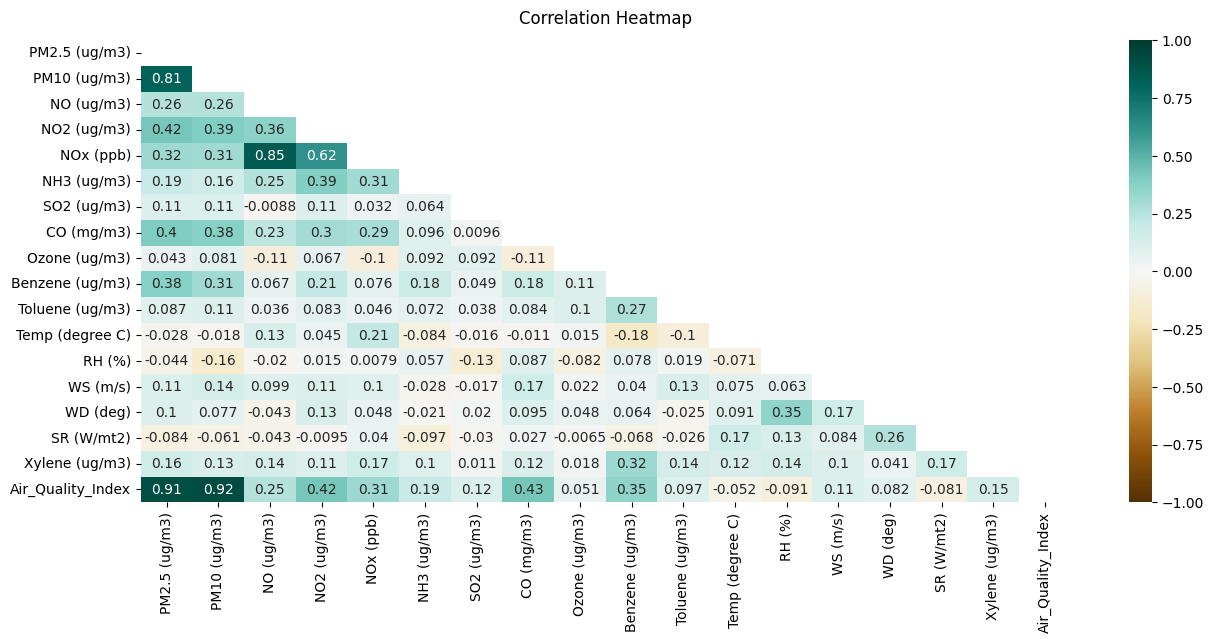

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(Air_Pollutants.corr()['Air_Quality_Index'], dtype=np.bool))

Heatmap= sns.heatmap(Air_Pollutants.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="BrBG");
Heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

<ipython-input-32-71e79f1b6c96>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(Air_Pollutants.corr()[['Air_Quality_Index']].sort_values(by='Air_Quality_Index', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


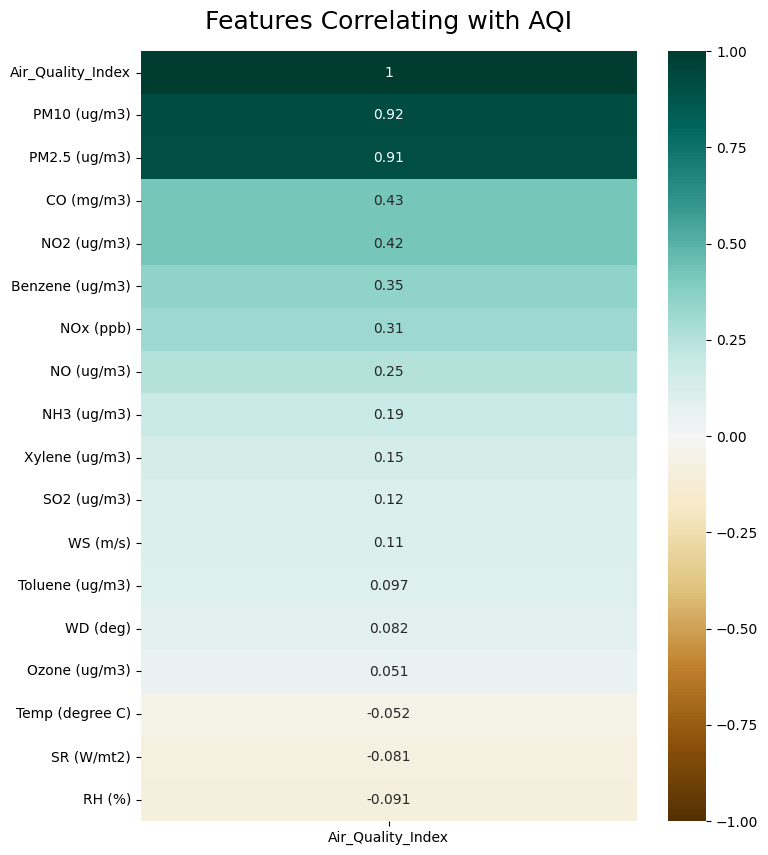

In [ ]:
plt.figure(figsize=(8, 10))
heatmap = sns.heatmap(Air_Pollutants.corr()[['Air_Quality_Index']].sort_values(by='Air_Quality_Index', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with AQI', fontdict={'fontsize':18}, pad=16);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

# Feature Selection

In [ ]:
# Columns having the missing values more than 70% and columns haning week correlation with AQI are removed
Air_Pollutants.drop(columns=['Temp (degree C)','Xylene (ug/m3)','RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)','Ozone (ug/m3)','Benzene (ug/m3)', 'Toluene (ug/m3)'], inplace=True)

In [ ]:
Air_Pollutants.columns

Index(['Date', 'State', 'City', 'Monitoring Station', 'PM2.5 (ug/m3)',
       'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)',
       'SO2 (ug/m3)', 'CO (mg/m3)', 'Air_Quality_Index'],
      dtype='object')

In [ ]:
Air_Pollutants.to_excel('NonNullData.xlsx')

# Data Description

In [ ]:
Air_Pollutants.describe()

PM2.5 (ug/m3)  PM10 (ug/m3)    NO (ug/m3)   NO2 (ug/m3)     NOx (ppb)  \
count   38277.000000  38277.000000  38277.000000  38277.000000  38277.000000   
mean       62.147408    132.648127     13.346512     22.942600     26.383201   
std        48.286427     83.621161     18.614464     16.881163     22.803996   
min         0.000000      0.000000      0.000000      0.010000      0.000000   
25%        30.620000     72.700000      4.540000     10.880000     12.910000   
50%        49.340000    113.890000      8.610000     19.110000     21.130000   
75%        79.600000    171.650000     14.900000     29.590000     32.560000   
max       999.990000    999.990000    467.630000    259.570000    471.790000   

        NH3 (ug/m3)   SO2 (ug/m3)    CO (mg/m3)  Air_Quality_Index  
count  38277.000000  38277.000000  38277.000000       38277.000000  
mean      31.765125     12.029370      0.846457         142.614213  
std       31.369546     10.475631      0.599170          92.931801  
min        0.000000      0.000000      0.000000           1.600000  
25%       11.660000      5.820000      0.460000          77.200000  
50%       25.000000      9.250000      0.690000         113.953333  
75%       42.310000     15.100000      1.050000         180.033333  
max      498.400000    187.600000      7.530000        1112.487500

# **Handling Outliers**







Removing values from columns where outliers are detected.

In [ ]:
from functools import reduce
# Define a list of conditions
conditions_list = [
    (Air_Pollutants['State'] == 'Delhi') & (Air_Pollutants['PM2.5 (ug/m3)'] > 550),
    (Air_Pollutants['State'] == 'Haryana') & (Air_Pollutants['PM2.5 (ug/m3)'] > 600),
    (Air_Pollutants['State'] == 'Punjab') & (Air_Pollutants['PM2.5 (ug/m3)'] >300 )

]

# reduce function is used to combine conditions with the | (OR) operator
filter_condition1 = reduce(lambda x, y: x | y, conditions_list)
# Filling the 'PM2.5 (ug/m3)' column with null values for the selected records
Air_Pollutants.loc[filter_condition1, 'PM2.5 (ug/m3)'] = None

In [ ]:

conditions_list = [
    (Air_Pollutants['State'] == 'Delhi') & (Air_Pollutants['PM10 (ug/m3)'] > 700),
    (Air_Pollutants['State'] == 'Haryana') & (Air_Pollutants['PM10 (ug/m3)'] > 700),
    (Air_Pollutants['State'] == 'Punjab') & (Air_Pollutants['PM10 (ug/m3)'] > 500)
]


filter_condition1 = reduce(lambda x, y: x | y, conditions_list)
# Filling the 'PM10 (ug/m3)' column with null values for the selected records
Air_Pollutants.loc[filter_condition1, 'PM10 (ug/m3)'] = None

In [ ]:

conditions_list = [
    (Air_Pollutants['State'] == 'Delhi') & (Air_Pollutants['NO (ug/m3)'] > 130),
    (Air_Pollutants['State'] == 'Haryana') & (Air_Pollutants['NO (ug/m3)'] > 210),
    (Air_Pollutants['State'] == 'Punjab') & (Air_Pollutants['NO (ug/m3)'] > 270)
]

filter_condition1 = reduce(lambda x, y: x | y, conditions_list)
# Filling the 'NO (ug/m3)' column with null values for the selected records
Air_Pollutants.loc[filter_condition1, 'NO (ug/m3)'] = None

In [ ]:

conditions_list = [
    (Air_Pollutants['State'] == 'Delhi') & (Air_Pollutants['NO2 (ug/m3)'] > 100),
    (Air_Pollutants['State'] == 'Haryana') & (Air_Pollutants['NO2 (ug/m3)'] > 145),
    (Air_Pollutants['State'] == 'Punjab') & (Air_Pollutants['NO2 (ug/m3)'] > 145)
]

filter_condition1 = reduce(lambda x, y: x | y, conditions_list)
# Filling the 'NO2 (ug/m3)' column with null values for the selected records
Air_Pollutants.loc[filter_condition1, 'NO2 (ug/m3)'] = None

In [ ]:

conditions_list = [
    (Air_Pollutants['State'] == 'Delhi') & (Air_Pollutants['NOx (ppb)'] > 150),
    (Air_Pollutants['State'] == 'Haryana') & (Air_Pollutants['NOx (ppb)'] > 210),
    (Air_Pollutants['State'] == 'Punjab') & (Air_Pollutants['NOx (ppb)'] > 190)
]

filter_condition1 = reduce(lambda x, y: x | y, conditions_list)
# Filling the 'NOx (ppb)' column with null values for the selected records
Air_Pollutants.loc[filter_condition1, 'NOx (ppb)'] = None

In [ ]:

conditions_list = [
    (Air_Pollutants['State'] == 'Delhi') & (Air_Pollutants['NH3 (ug/m3)'] > 75),
    (Air_Pollutants['State'] == 'Haryana') & (Air_Pollutants['NH3 (ug/m3)'] > 290),
    (Air_Pollutants['State'] == 'Punjab') & (Air_Pollutants['NH3 (ug/m3)'] > 150)
]


filter_condition1 = reduce(lambda x, y: x | y, conditions_list)
# Filling the 'NH3 (ug/m3)' column with null values for the selected records
Air_Pollutants.loc[filter_condition1, 'NH3 (ug/m3)'] = None

In [ ]:

conditions_list = [
    (Air_Pollutants['State'] == 'Delhi') & (Air_Pollutants['SO2 (ug/m3)'] > 30),
    (Air_Pollutants['State'] == 'Haryana') & (Air_Pollutants['SO2 (ug/m3)'] > 105),
    (Air_Pollutants['State'] == 'Punjab') & (Air_Pollutants['SO2 (ug/m3)'] > 55)
]


filter_condition1 = reduce(lambda x, y: x | y, conditions_list)
# Filling the 'SO2 (ug/m3)' column with null values for the selected records
Air_Pollutants.loc[filter_condition1, 'SO2 (ug/m3)'] = None

In [ ]:

conditions_list = [
    (Air_Pollutants['State'] == 'Delhi') & (Air_Pollutants['CO (mg/m3)'] > 3.50),
    (Air_Pollutants['State'] == 'Haryana') & (Air_Pollutants['CO (mg/m3)'] > 5.50),
    (Air_Pollutants['State'] == 'Punjab') & (Air_Pollutants['CO (mg/m3)'] > 3.30)
]

# Use reduce to combine conditions with the | (OR) operator
filter_condition1 = reduce(lambda x, y: x | y, conditions_list)
# Filling the 'CO (mg/m3)' column with null values for the selected records
Air_Pollutants.loc[filter_condition1, 'CO (mg/m3)'] = None

In [ ]:
Air_Pollutants.isna().sum()

Date                   0
State                  0
City                   0
Monitoring Station     0
PM2.5 (ug/m3)          6
PM10 (ug/m3)          19
NO (ug/m3)            30
NO2 (ug/m3)           10
NOx (ppb)             47
NH3 (ug/m3)           43
SO2 (ug/m3)           38
CO (mg/m3)            35
Air_Quality_Index      0
dtype: int64

In [ ]:
Air_Pollutants.to_excel('withoutliers.xlsx')

In [ ]:
Air_Pollutants

Date   State      City              Monitoring Station  \
0     2019-01-01  Punjab  Amritsar  Golden Temple, Amritsar - PPCB   
1     2019-01-02  Punjab  Amritsar  Golden Temple, Amritsar - PPCB   
2     2019-01-03  Punjab  Amritsar  Golden Temple, Amritsar - PPCB   
3     2019-01-04  Punjab  Amritsar  Golden Temple, Amritsar - PPCB   
4     2019-01-05  Punjab  Amritsar  Golden Temple, Amritsar - PPCB   
...          ...     ...       ...                             ...   
38272 2023-10-11   Delhi     Delhi                     Delhi, DPCB   
38273 2023-10-12   Delhi     Delhi                     Delhi, DPCB   
38274 2023-10-13   Delhi     Delhi                     Delhi, DPCB   
38275 2023-10-14   Delhi     Delhi                     Delhi, DPCB   
38276 2023-10-15   Delhi     Delhi                     Delhi, DPCB   

       PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  NOx (ppb)  \
0          91.570000    203.600000   22.430000    20.930000  43.770000   
1          74.460000    171.780000   40.650000    21.020000  57.360000   
2          44.130000     97.990000   31.130000    27.790000  59.090000   
3          34.800000     77.260000   29.940000    32.320000  62.250000   
4          26.740000     59.370000   26.500000    29.090000  55.510000   
...              ...           ...         ...          ...        ...   
38272      85.398500    191.266500   21.390000    34.381500  44.805500   
38273     116.253500    244.066000   32.976000    43.017000  62.555500   
38274     133.343529    301.104118   37.158824    50.130588  70.611765   
38275     109.264118    268.819412   53.785882    43.270588  79.911765   
38276     140.915294    350.900000         NaN    43.189412        NaN   

       NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  Air_Quality_Index  
0         6.600000     2.890000    0.150000         205.233333  
1         9.830000     3.410000    0.050000         148.200000  
2         9.180000     3.510000    0.010000          97.990000  
3         9.370000     3.490000    0.000000          77.260000  
4         8.300000     2.260000    0.000000          59.370000  
...            ...          ...         ...                ...  
38272    32.099375     7.831875    1.043000         184.661667  
38273    33.511250     8.250625    1.249500         287.511667  
38274    35.227500     8.840000    1.285294         310.264253  
38275    37.143125     8.165625    1.361765         264.213725  
38276    40.662500    11.907143    2.038750         316.088688  

[38277 rows x 13 columns]

Applying Time based Interpolation to fill the missing values.

In [ ]:

Air_Pollutants['Date'] = pd.to_datetime(Air_Pollutants['Date'])


In [ ]:
Air_Pollutants.rename(columns={'Date': 'Recorded_Date'}, inplace=True)

In [ ]:
# Sort the DataFrame by 'Monitoring Station', 'Date', and any other relevant columns
Air_Pollutants.sort_values(by=['Monitoring Station', 'Recorded_Date'], inplace=True)


In [ ]:
Air_Pollutants = Air_Pollutants.set_index('Recorded_Date')

In [ ]:
# Time interpolation
columns_to_interpolate = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)']

for column in columns_to_interpolate:
    Air_Pollutants[column] = Air_Pollutants.groupby('Monitoring Station')[column].transform(lambda x: x.interpolate(method='time'))

In [ ]:
Air_Pollutants.isna().sum()

State                 0
City                  0
Monitoring Station    0
PM2.5 (ug/m3)         0
PM10 (ug/m3)          0
NO (ug/m3)            0
NO2 (ug/m3)           0
NOx (ppb)             0
NH3 (ug/m3)           0
SO2 (ug/m3)           0
CO (mg/m3)            0
Air_Quality_Index     0
dtype: int64

In [ ]:
Air_Pollutants.columns

Index(['State', 'City', 'Monitoring Station', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)',
       'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)',
       'CO (mg/m3)', 'Air_Quality_Index'],
      dtype='object')

Recalculate AQI with changed values.

In [ ]:
# Remove Air_Quality_Index
Air_Pollutants.drop(columns=['Air_Quality_Index'], inplace=True)

In [ ]:
# 'PM2.5 (ug/m3)' column
def calculate_pm25_sub_index(concentration):
    if pd.isna(concentration):
        return 0
    elif concentration <= 30:
        return concentration * 50 / 30
    elif 30 < concentration <= 60:
        return 50 + (concentration - 30) * 50 / 30
    elif 60 < concentration <= 90:
        return 100 + (concentration - 60) * 100 / 30
    elif 90 < concentration <= 120:
        return 200 + (concentration - 90) * (100 / 30)
    elif 120 < concentration <= 250:
        return 300 + (concentration - 120) * (100 / 130)
    elif concentration > 250:
        return 400 + (concentration - 250) * (100 / 130)


Air_Pollutants['PM2.5_Sub_Index'] = Air_Pollutants['PM2.5 (ug/m3)'].apply(calculate_pm25_sub_index)


In [ ]:
# 'PM10 (ug/m3)' column

def calculate_pm10_sub_index(concentration):
    if pd.isna(concentration):
        return 0
    elif concentration <= 50:
        return concentration
    elif 50 < concentration <= 100:
        return concentration
    elif 100 < concentration <= 250:
        return 100 + (concentration - 100) * 100 / 150
    elif 250 < concentration <= 350:
        return 200 + (concentration - 250)
    elif 350 < concentration <= 430:
        return 300 + (concentration - 350) * (100 / 80)
    elif concentration > 430:
        return 400 + (concentration - 430) * (100 / 80)

Air_Pollutants['PM10_Sub_Index'] = Air_Pollutants['PM10 (ug/m3)'].apply(calculate_pm10_sub_index)

In [ ]:
# 'NO2 (ug/m3)' column

def calculate_no2_sub_index(concentration):
    if pd.isna(concentration):
        return 0
    elif concentration <= 40:
        return concentration * 50 / 40
    elif 40 < concentration <= 80:
        return 50 + (concentration - 40) * 50 / 40
    elif 80 < concentration <= 180:
        return 100 + (concentration - 80) * 100 / 100
    elif 180 < concentration <= 280:
        return 200 + (concentration - 180) * (100 / 100)
    elif 280 < concentration <= 400:
        return 300 + (concentration - 280) * (100 / 120)
    elif concentration > 400:
        return 400 + (concentration - 400) * (100 / 120)


Air_Pollutants['NO2_Sub_Index'] = Air_Pollutants['NO2 (ug/m3)'].apply(calculate_no2_sub_index)

In [ ]:
# 'NH3_Sub_Index' column
def calculate_nh3_sub_index(concentration):
    if pd.isna(concentration):
        return 0
    elif concentration <= 200:
        return concentration * 50 / 200
    elif 200 < concentration <= 400:
        return 50 + (concentration - 200) * 50 / 200
    elif 400 < concentration <= 800:
        return 100 + (concentration - 400) * 100 / 400
    elif 800 < concentration <= 1200:
        return 200 + (concentration - 800) * (100 / 400)
    elif 1200 < concentration <= 1800:
        return 300 + (concentration - 1200) * (100 / 600)
    elif concentration > 1800:
        return 400 + (concentration - 1800) * (100 / 600)


Air_Pollutants['NH3_Sub_Index'] = Air_Pollutants['NH3 (ug/m3)'].apply(calculate_nh3_sub_index)

In [ ]:
# 'SO2_Sub_Index' column
def calculate_so2_sub_index(concentration):
    if pd.isna(concentration):
        return 0
    elif concentration <= 40:
        return concentration * 50 / 40
    elif 40 < concentration <= 80:
        return 50 + (concentration - 40) * 50 / 40
    elif 80 < concentration <= 380:
        return 100 + (concentration - 80) * 100 / 300
    elif 380 < concentration <= 800:
        return 200 + (concentration - 380) * (100 / 420)
    elif 800 < concentration <= 1600:
        return 300 + (concentration - 800) * (100 / 800)
    elif concentration > 1600:
        return 400 + (concentration - 1600) * (100 / 800)


Air_Pollutants['SO2_Sub_Index'] = Air_Pollutants['SO2 (ug/m3)'].apply(calculate_so2_sub_index)

In [ ]:
# 'CO_Sub_Index' column

def calculate_co_sub_index(concentration):
    if pd.isna(concentration):
        return 0
    elif concentration <= 1:
        return concentration * 50 / 1
    elif 1 < concentration <= 2:
        return 50 + (concentration - 1) * 50 / 1
    elif 2 < concentration <= 10:
        return 100 + (concentration - 2) * 100 / 8
    elif 10 < concentration <= 17:
        return 200 + (concentration - 10) * (100 / 7)
    elif 17 < concentration <= 34:
        return 300 + (concentration - 17) * (100 / 17)
    elif concentration > 34:
        return 400 + (concentration - 34) * (100 / 17)

Air_Pollutants['CO_Sub_Index'] = Air_Pollutants['CO (mg/m3)'].apply(calculate_co_sub_index)

In [ ]:
# Create new columns to store the check results
Air_Pollutants['PM2.5_Check'] = Air_Pollutants['PM2.5_Sub_Index'].apply(lambda x: 0 if pd.isna(x) or x <= 0 else 1)
Air_Pollutants['PM10_Check'] = Air_Pollutants['PM10_Sub_Index'].apply(lambda x: 0 if pd.isna(x) or x <= 0 else 1)
Air_Pollutants['NO2_Check'] = Air_Pollutants['NO2_Sub_Index'].apply(lambda x: 0 if pd.isna(x) or x <= 0 else 1)
Air_Pollutants['NH3_Check'] = Air_Pollutants['NH3_Sub_Index'].apply(lambda x: 0 if pd.isna(x) or x <= 0 else 1)
Air_Pollutants['SO2_Check'] = Air_Pollutants['SO2_Sub_Index'].apply(lambda x: 0 if pd.isna(x) or x <= 0 else 1)
Air_Pollutants['CO_Check'] = Air_Pollutants['CO_Sub_Index'].apply(lambda x: 0 if pd.isna(x) or x <= 0 else 1)

In [ ]:
# Create a new column AQI based on the specified conditions
Air_Pollutants['AQI'] = Air_Pollutants.apply(lambda row:
    max(row['PM2.5_Sub_Index'], row['PM10_Sub_Index'], row['NO2_Sub_Index'],
        row['NH3_Sub_Index'], row['SO2_Sub_Index'], row['CO_Sub_Index'])
    if row['PM2.5_Check'] == 1 or row['PM10_Check'] == 1 and
       (row['PM2.5_Check'] + row['PM10_Check'] + row['NO2_Check'] +
        row['NH3_Check'] + row['SO2_Check'] + row['CO_Check'] >= 3)
    else "Atleast 3 inputs*", axis=1)

In [ ]:
Air_Pollutants.columns

Index(['State', 'City', 'Monitoring Station', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)',
       'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)',
       'CO (mg/m3)', 'PM2.5_Sub_Index', 'PM10_Sub_Index', 'NO2_Sub_Index',
       'NH3_Sub_Index', 'SO2_Sub_Index', 'CO_Sub_Index', 'PM2.5_Check',
       'PM10_Check', 'NO2_Check', 'NH3_Check', 'SO2_Check', 'CO_Check', 'AQI'],
      dtype='object')

In [ ]:
# Columns used to calculate AQI are removed
Air_Pollutants.drop(columns=['PM2.5_Sub_Index', 'PM10_Sub_Index', 'NO2_Sub_Index',
       'NH3_Sub_Index', 'SO2_Sub_Index', 'CO_Sub_Index', 'PM2.5_Check',
       'PM10_Check', 'NO2_Check', 'NH3_Check', 'SO2_Check', 'CO_Check'], inplace=True)

In [ ]:
Air_Pollutants.to_excel('NoOutliersData.xlsx')

In [ ]:
Air_Pollutants.dtypes

State                  object
City                   object
Monitoring Station     object
PM2.5 (ug/m3)         float64
PM10 (ug/m3)          float64
NO (ug/m3)            float64
NO2 (ug/m3)           float64
NOx (ppb)             float64
NH3 (ug/m3)           float64
SO2 (ug/m3)           float64
CO (mg/m3)            float64
AQI                   float64
dtype: object

Data Description

In [ ]:
Air_Pollutants.describe()

PM2.5 (ug/m3)  PM10 (ug/m3)    NO (ug/m3)   NO2 (ug/m3)     NOx (ppb)  \
count   38277.000000  38277.000000  38277.000000  38277.000000  38277.000000   
mean       62.089894    132.405490     13.243753     22.904776     26.219595   
std        47.727106     82.280208     17.367982     16.624767     21.469129   
min         0.000000      0.000000      0.000000      0.010000      0.000000   
25%        30.620000     72.700000      4.540000     10.880000     12.910000   
50%        49.340000    113.880000      8.610000     19.110000     21.130000   
75%        79.600000    171.631154     14.900000     29.580000     32.560000   
max       576.870000    697.380000    263.060000    141.190000    207.920000   

        NH3 (ug/m3)   SO2 (ug/m3)    CO (mg/m3)           AQI  
count  38277.000000  38277.000000  38277.000000  38277.000000  
mean      31.595502     11.950559      0.844393    142.253383  
std       30.222796      9.941695      0.586576     91.354499  
min        0.000000      0.000000      0.000000      1.600000  
25%       11.660000      5.820000      0.460000     77.100000  
50%       25.000000      9.240000      0.690000    113.866667  
75%       42.300000     15.099000      1.050000    179.966667  
max      287.340000    103.050000      5.370000    734.225000

Data Distribution(Histograms)

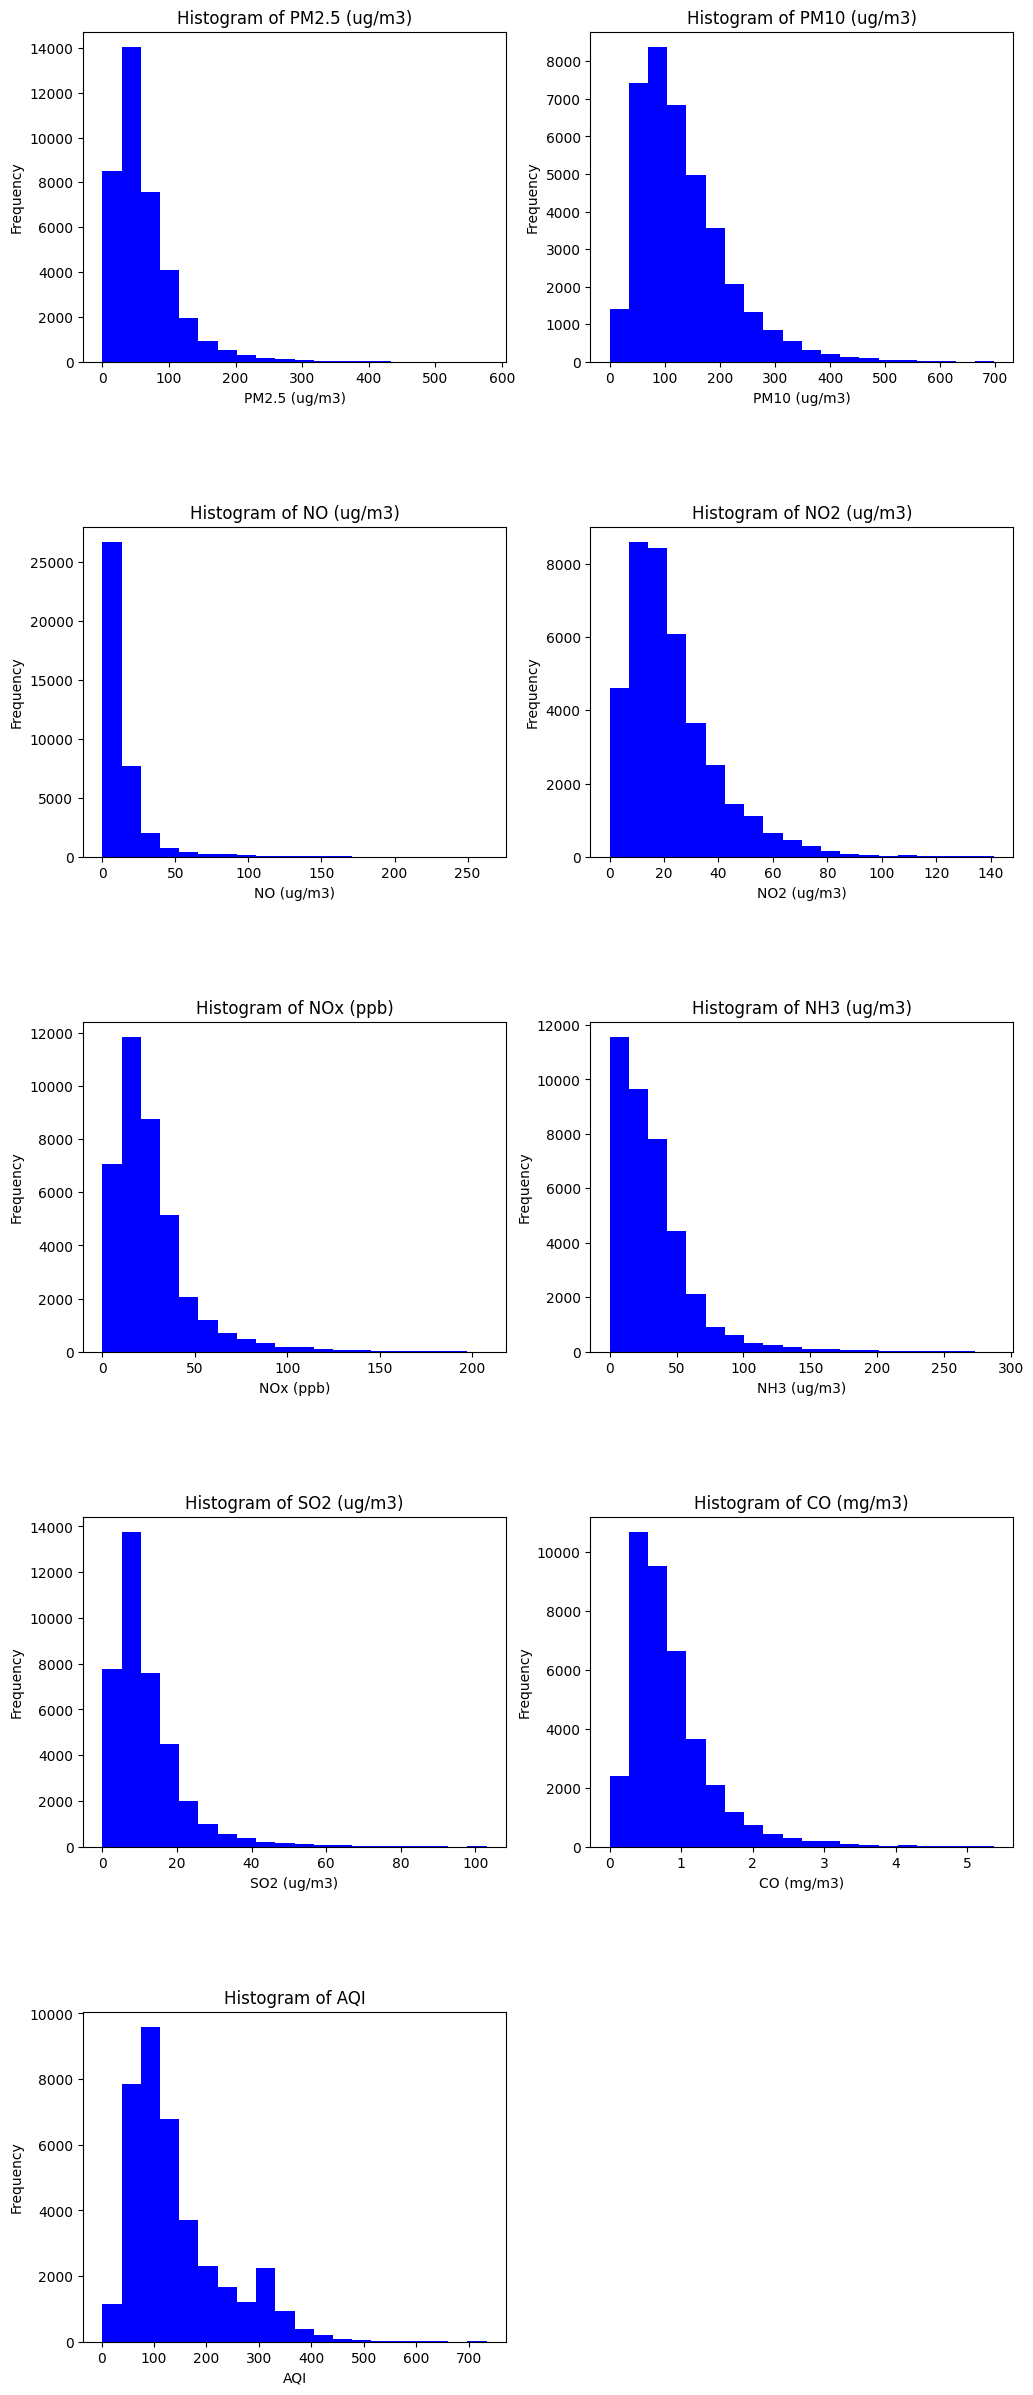

In [ ]:
Polluted_States_Refined= Air_Pollutants[['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)','NH3 (ug/m3)','SO2 (ug/m3)','CO (mg/m3)','AQI']]

# Calculate the number of rows and columns for the subplots
num_columns = len(Polluted_States_Refined.columns)
num_rows = (num_columns + 1) // 2  # Add 1 to ensure an extra row if there's an odd number of columns

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots

# Generate histograms for each column and plot them in subplots
for i, column in enumerate(Polluted_States_Refined.columns):
    row_index = i // 2
    col_index = i % 2
    ax = axes[row_index, col_index]

    ax.hist(Polluted_States_Refined[column], bins=20, color='blue')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(False)

# If there are an odd number of columns, remove the empty subplot in the last row
if num_columns % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.show()

In [ ]:
Air_Pollutants

State         City               Monitoring Station  \
Recorded_Date                                                          
2019-01-01     Haryana  Bahadurgarh  Arya Nagar, Bahadurgarh - HSPCB   
2019-01-02     Haryana  Bahadurgarh  Arya Nagar, Bahadurgarh - HSPCB   
2019-01-03     Haryana  Bahadurgarh  Arya Nagar, Bahadurgarh - HSPCB   
2019-01-04     Haryana  Bahadurgarh  Arya Nagar, Bahadurgarh - HSPCB   
2019-01-05     Haryana  Bahadurgarh  Arya Nagar, Bahadurgarh - HSPCB   
...                ...          ...                              ...   
2023-10-12     Haryana        Hisar   Urban Estate-II, Hisar - HSPCB   
2023-10-13     Haryana        Hisar   Urban Estate-II, Hisar - HSPCB   
2023-10-14     Haryana        Hisar   Urban Estate-II, Hisar - HSPCB   
2023-10-15     Haryana        Hisar   Urban Estate-II, Hisar - HSPCB   
2023-10-16     Haryana        Hisar   Urban Estate-II, Hisar - HSPCB   

               PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
Recorded_Date                                                         
2019-01-01           167.915    336.756786   41.153571    59.574643   
2019-01-02           167.915    336.756786   41.153571    59.574643   
2019-01-03           167.915    336.756786   41.153571    59.574643   
2019-01-04           304.020    419.350000   52.030000    75.500000   
2019-01-05           330.370    649.750000   62.120000    84.820000   
...                      ...           ...         ...          ...   
2023-10-12            41.910    124.960000   11.470000     7.910000   
2023-10-13            46.820    128.050000   11.560000     6.060000   
2023-10-14            37.080    115.370000   11.510000     6.060000   
2023-10-15            19.110    102.020000   11.350000     6.070000   
2023-10-16            27.700     96.300000   13.740000     5.640000   

                NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)         AQI  
Recorded_Date                                                                
2019-01-01      75.466429    79.925714     4.834643    1.258929  336.857692  
2019-01-02      75.466429    79.925714     4.834643    1.258929  336.857692  
2019-01-03      75.466429    79.925714     4.834643    1.258929  336.857692  
2019-01-04     157.180000    78.010000     1.850000    1.680000  441.553846  
2019-01-05     184.980000    90.570000     1.260000    2.010000  674.687500  
...                   ...          ...          ...         ...         ...  
2023-10-12      14.160000    10.300000     6.160000    0.530000  116.640000  
2023-10-13      14.460000    10.890000     5.070000    0.530000  118.700000  
2023-10-14      14.460000    10.900000     3.900000    0.530000  110.246667  
2023-10-15      14.370000    10.920000     3.780000    0.530000  101.346667  
2023-10-16      15.720000    10.140000     4.080000    0.530000   96.300000  

[38277 rows x 12 columns]

In [ ]:
Air_Pollutants.columns

Index(['State', 'City', 'Monitoring Station', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)',
       'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)',
       'CO (mg/m3)', 'AQI'],
      dtype='object')

# Feature Engineering

One Hot Encoding using get_dumies

In [ ]:
# Select categorical columns
categorical_columns = ['State', 'City']

# Apply one-hot encoding using get_dummies
Air_Pollutants = pd.get_dummies(Air_Pollutants, columns=categorical_columns, prefix=categorical_columns)


In [ ]:
Air_Pollutants

Monitoring Station  PM2.5 (ug/m3)  PM10 (ug/m3)  \
Recorded_Date                                                                 
2019-01-01     Arya Nagar, Bahadurgarh - HSPCB        167.915    336.756786   
2019-01-02     Arya Nagar, Bahadurgarh - HSPCB        167.915    336.756786   
2019-01-03     Arya Nagar, Bahadurgarh - HSPCB        167.915    336.756786   
2019-01-04     Arya Nagar, Bahadurgarh - HSPCB        304.020    419.350000   
2019-01-05     Arya Nagar, Bahadurgarh - HSPCB        330.370    649.750000   
...                                        ...            ...           ...   
2023-10-12      Urban Estate-II, Hisar - HSPCB         41.910    124.960000   
2023-10-13      Urban Estate-II, Hisar - HSPCB         46.820    128.050000   
2023-10-14      Urban Estate-II, Hisar - HSPCB         37.080    115.370000   
2023-10-15      Urban Estate-II, Hisar - HSPCB         19.110    102.020000   
2023-10-16      Urban Estate-II, Hisar - HSPCB         27.700     96.300000   

               NO (ug/m3)  NO2 (ug/m3)   NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  \
Recorded_Date                                                                  
2019-01-01      41.153571    59.574643   75.466429    79.925714     4.834643   
2019-01-02      41.153571    59.574643   75.466429    79.925714     4.834643   
2019-01-03      41.153571    59.574643   75.466429    79.925714     4.834643   
2019-01-04      52.030000    75.500000  157.180000    78.010000     1.850000   
2019-01-05      62.120000    84.820000  184.980000    90.570000     1.260000   
...                   ...          ...         ...          ...          ...   
2023-10-12      11.470000     7.910000   14.160000    10.300000     6.160000   
2023-10-13      11.560000     6.060000   14.460000    10.890000     5.070000   
2023-10-14      11.510000     6.060000   14.460000    10.900000     3.900000   
2023-10-15      11.350000     6.070000   14.370000    10.920000     3.780000   
2023-10-16      13.740000     5.640000   15.720000    10.140000     4.080000   

               CO (mg/m3)         AQI  ...  City_Karnal  City_Khanna  \
Recorded_Date                          ...                             
2019-01-01       1.258929  336.857692  ...            0            0   
2019-01-02       1.258929  336.857692  ...            0            0   
2019-01-03       1.258929  336.857692  ...            0            0   
2019-01-04       1.680000  441.553846  ...            0            0   
2019-01-05       2.010000  674.687500  ...            0            0   
...                   ...         ...  ...          ...          ...   
2023-10-12       0.530000  116.640000  ...            0            0   
2023-10-13       0.530000  118.700000  ...            0            0   
2023-10-14       0.530000  110.246667  ...            0            0   
2023-10-15       0.530000  101.346667  ...            0            0   
2023-10-16       0.530000   96.300000  ...            0            0   

               City_Kurukshetra   City_Ludhiana  City_Mandikhera  \
Recorded_Date                                                      
2019-01-01                     0              0                0   
2019-01-02                     0              0                0   
2019-01-03                     0              0                0   
2019-01-04                     0              0                0   
2019-01-05                     0              0                0   
...                          ...            ...              ...   
2023-10-12                     0              0                0   
2023-10-13                     0              0                0   
2023-10-14                     0              0                0   
2023-10-15                     0              0                0   
2023-10-16                     0              0                0   

               City_Manesar  City_Palwal  City_Rupnagar  City_Sirsa  \
Recorded_Date                                                     

In [ ]:
Air_Pollutants.to_excel('OneHotEncodedData.xlsx')

In [ ]:
# Filter columns that start with 'Monitoring_Station'
Filtered_columns = Air_Pollutants.filter(like='Monitoring', axis=1)

# Drop the filtered columns from the DataFrame
Air_Pollutants.drop(columns=Filtered_columns.columns, inplace=True)


In [ ]:
Air_Pollutants.columns

Index(['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)',
       'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'AQI',
       'State_Delhi', 'State_Haryana', 'State_Punjab', 'City_Ambala',
       'City_Amritsar', 'City_Bahadurgarh', 'City_Ballabgarh', 'City_Bathinda',
       'City_Bhiwani', 'City_Delhi', 'City_Dharuhera', 'City_Fatehabad',
       'City_Hisar', 'City_Jalandhar', 'City_Jind', 'City_Karnal',
       'City_Khanna', 'City_Kurukshetra ', 'City_Ludhiana', 'City_Mandikhera',
       'City_Manesar', 'City_Palwal', 'City_Rupnagar', 'City_Sirsa',
       'City_Yamuna Nagar'],
      dtype='object')

In [ ]:
Air_Pollutants

PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
Recorded_Date                                                         
2019-01-01           167.915    336.756786   41.153571    59.574643   
2019-01-02           167.915    336.756786   41.153571    59.574643   
2019-01-03           167.915    336.756786   41.153571    59.574643   
2019-01-04           304.020    419.350000   52.030000    75.500000   
2019-01-05           330.370    649.750000   62.120000    84.820000   
...                      ...           ...         ...          ...   
2023-10-12            41.910    124.960000   11.470000     7.910000   
2023-10-13            46.820    128.050000   11.560000     6.060000   
2023-10-14            37.080    115.370000   11.510000     6.060000   
2023-10-15            19.110    102.020000   11.350000     6.070000   
2023-10-16            27.700     96.300000   13.740000     5.640000   

                NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)         AQI  \
Recorded_Date                                                                 
2019-01-01      75.466429    79.925714     4.834643    1.258929  336.857692   
2019-01-02      75.466429    79.925714     4.834643    1.258929  336.857692   
2019-01-03      75.466429    79.925714     4.834643    1.258929  336.857692   
2019-01-04     157.180000    78.010000     1.850000    1.680000  441.553846   
2019-01-05     184.980000    90.570000     1.260000    2.010000  674.687500   
...                   ...          ...          ...         ...         ...   
2023-10-12      14.160000    10.300000     6.160000    0.530000  116.640000   
2023-10-13      14.460000    10.890000     5.070000    0.530000  118.700000   
2023-10-14      14.460000    10.900000     3.900000    0.530000  110.246667   
2023-10-15      14.370000    10.920000     3.780000    0.530000  101.346667   
2023-10-16      15.720000    10.140000     4.080000    0.530000   96.300000   

               State_Delhi  ...  City_Karnal  City_Khanna  City_Kurukshetra   \
Recorded_Date               ...                                                
2019-01-01               0  ...            0            0                  0   
2019-01-02               0  ...            0            0                  0   
2019-01-03               0  ...            0            0                  0   
2019-01-04               0  ...            0            0                  0   
2019-01-05               0  ...            0            0                  0   
...                    ...  ...          ...          ...                ...   
2023-10-12               0  ...            0            0                  0   
2023-10-13               0  ...            0            0                  0   
2023-10-14               0  ...            0            0                  0   
2023-10-15               0  ...            0            0                  0   
2023-10-16               0  ...            0            0                  0   

               City_Ludhiana  City_Mandikhera  City_Manesar  City_Palwal  \
Recorded_Date                                                              
2019-01-01                 0                0             0            0   
2019-01-02                 0                0             0            0   
2019-01-03                 0                0             0            0   
2019-01-04                 0                0             0            0   
2019-01-05                 0                0             0            0   
...                      ...              ...           ...          ...   
2023-10-12                 0                0             0            0   
2023-10-13                 0                0             0            0   
2023-10-14                 0                0             0            0   
2023-10-15                 0                0             0            0   
2023-10-16                 0                0             0            0   

               City_Rupnagar  Cit

Date Extraction

# Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for standardization
numerical_columns = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)','AQI']

# Apply Standardization to numerical columns in-place
scaler = StandardScaler()
Air_Pollutants[numerical_columns] = scaler.fit_transform(Air_Pollutants[numerical_columns])

# Display the DataFrame with scaled numerical columns
Air_Pollutants



PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
Recorded_Date                                                         
2019-01-01          2.217325      2.483635    1.606991     2.205766   
2019-01-02          2.217325      2.483635    1.606991     2.205766   
2019-01-03          2.217325      2.483635    1.606991     2.205766   
2019-01-04          5.069096      3.487452    2.233233     3.163708   
2019-01-05          5.621200      6.287676    2.814195     3.724325   
...                      ...           ...         ...          ...   
2023-10-12         -0.422824     -0.090491   -0.102129    -0.901966   
2023-10-13         -0.319946     -0.052936   -0.096947    -1.013247   
2023-10-14         -0.524026     -0.207045   -0.099826    -1.013247   
2023-10-15         -0.900546     -0.369298   -0.109038    -1.012646   
2023-10-16         -0.720562     -0.438817    0.028573    -1.038511   

               NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)       AQI  \
Recorded_Date                                                              
2019-01-01      2.293874     1.599152    -0.715774    0.706713  2.130238   
2019-01-02      2.293874     1.599152    -0.715774    0.706713  2.130238   
2019-01-03      2.293874     1.599152    -0.715774    0.706713  2.130238   
2019-01-04      6.100020     1.535765    -1.015993    1.424568  3.276296   
2019-01-05      7.394919     1.951351    -1.075340    1.987162  5.828296   
...                  ...          ...          ...         ...       ...   
2023-10-12     -0.561725    -0.704626    -0.582459   -0.535987 -0.280377   
2023-10-13     -0.547752    -0.685104    -0.692100   -0.535987 -0.257827   
2023-10-14     -0.547752    -0.684774    -0.809788   -0.535987 -0.350362   
2023-10-15     -0.551944    -0.684112    -0.821858   -0.535987 -0.447786   
2023-10-16     -0.489062    -0.709920    -0.791682   -0.535987 -0.503029   

               State_Delhi  ...  City_Karnal  City_Khanna  City_Kurukshetra   \
Recorded_Date               ...                                                
2019-01-01               0  ...            0            0                  0   
2019-01-02               0  ...            0            0                  0   
2019-01-03               0  ...            0            0                  0   
2019-01-04               0  ...            0            0                  0   
2019-01-05               0  ...            0            0                  0   
...                    ...  ...          ...          ...                ...   
2023-10-12               0  ...            0            0                  0   
2023-10-13               0  ...            0            0                  0   
2023-10-14               0  ...            0            0                  0   
2023-10-15               0  ...            0            0                  0   
2023-10-16               0  ...            0            0                  0   

               City_Ludhiana  City_Mandikhera  City_Manesar  City_Palwal  \
Recorded_Date                                                              
2019-01-01                 0                0             0            0   
2019-01-02                 0                0             0            0   
2019-01-03                 0                0             0            0   
2019-01-04                 0                0             0            0   
2019-01-05                 0                0             0            0   
...                      ...              ...           ...          ...   
2023-10-12                 0                0             0            0   
2023-10-13                 0                0             0            0   
2023-10-14                 0                0             0            0   
2023-10-15                 0                0             0            0   
2023-10-16                 0                0             0            0   

               City_Rupnagar  City_Sirsa  City_Yamuna Nagar  
Recorded_D

# Data Split

In [ ]:
# Specify the split date
split_date = '2022-10-1'

# Split the data into training and testing sets
train_data = Air_Pollutants[Air_Pollutants.index < split_date]
test_data = Air_Pollutants[Air_Pollutants.index >= split_date]


In [ ]:
X_train = train_data.drop(columns=['AQI'])
y_train = train_data['AQI']
X_test= test_data.drop(columns=['AQI'])
y_test = test_data['AQI']

In [ ]:
Air_Pollutants.to_excel('scaledData.xlsx')

In [ ]:
Air_Pollutants.dtypes

PM2.5 (ug/m3)        float64
PM10 (ug/m3)         float64
NO (ug/m3)           float64
NO2 (ug/m3)          float64
NOx (ppb)            float64
NH3 (ug/m3)          float64
SO2 (ug/m3)          float64
CO (mg/m3)           float64
AQI                  float64
State_Delhi            uint8
State_Haryana          uint8
State_Punjab           uint8
City_Ambala            uint8
City_Amritsar          uint8
City_Bahadurgarh       uint8
City_Ballabgarh        uint8
City_Bathinda          uint8
City_Bhiwani           uint8
City_Delhi             uint8
City_Dharuhera         uint8
City_Fatehabad         uint8
City_Hisar             uint8
City_Jalandhar         uint8
City_Jind              uint8
City_Karnal            uint8
City_Khanna            uint8
City_Kurukshetra       uint8
City_Ludhiana          uint8
City_Mandikhera        uint8
City_Manesar           uint8
City_Palwal            uint8
City_Rupnagar          uint8
City_Sirsa             uint8
City_Yamuna Nagar      uint8
dtype: object

# Methodology

# catboost

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

In [ ]:
catboost_model = CatBoostRegressor()

In [ ]:
# Fit the model to the training data
catboost_model.fit(X_train, y_train)

Learning rate set to 0.070119
0:	learn: 0.9629944	total: 140ms	remaining: 2m 19s
1:	learn: 0.9004391	total: 175ms	remaining: 1m 27s
2:	learn: 0.8430984	total: 201ms	remaining: 1m 6s
3:	learn: 0.7896590	total: 251ms	remaining: 1m 2s
4:	learn: 0.7407586	total: 284ms	remaining: 56.5s
5:	learn: 0.6943426	total: 324ms	remaining: 53.7s
6:	learn: 0.6506743	total: 348ms	remaining: 49.4s
7:	learn: 0.6107209	total: 372ms	remaining: 46.2s
8:	learn: 0.5737721	total: 393ms	remaining: 43.2s
9:	learn: 0.5389956	total: 430ms	remaining: 42.6s
10:	learn: 0.5058052	total: 471ms	remaining: 42.4s
11:	learn: 0.4750937	total: 499ms	remaining: 41s
12:	learn: 0.4476389	total: 528ms	remaining: 40.1s
13:	learn: 0.4211086	total: 553ms	remaining: 38.9s
14:	learn: 0.3973088	total: 598ms	remaining: 39.3s
15:	learn: 0.3738558	total: 633ms	remaining: 38.9s
16:	learn: 0.3522413	total: 650ms	remaining: 37.6s
17:	learn: 0.3322946	total: 672ms	remaining: 36.6s
18:	learn: 0.3143634	total: 742ms	remaining: 38.3s
19:	learn: 

In [ ]:
# Make predictions on the test set
predictions = catboost_model.predict(X_test)


CatBoost Model Evaluation

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Route Mean Squared Error: {rmse}")

Mean Squared Error: 0.001125801221216391
Route Mean Squared Error: 0.03355296143735141


In [ ]:
# Evaluate the model using R-squared
r2 = r2_score(y_test, predictions)

print(f"R-squared (R2): {r2}")

R-squared (R2): 0.9985487560665219


In [ ]:
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.01272960525097629


In [ ]:
evs = explained_variance_score(y_test, predictions)
print(f"explained_variance_score: {evs}")

explained_variance_score: 0.9985488404043918


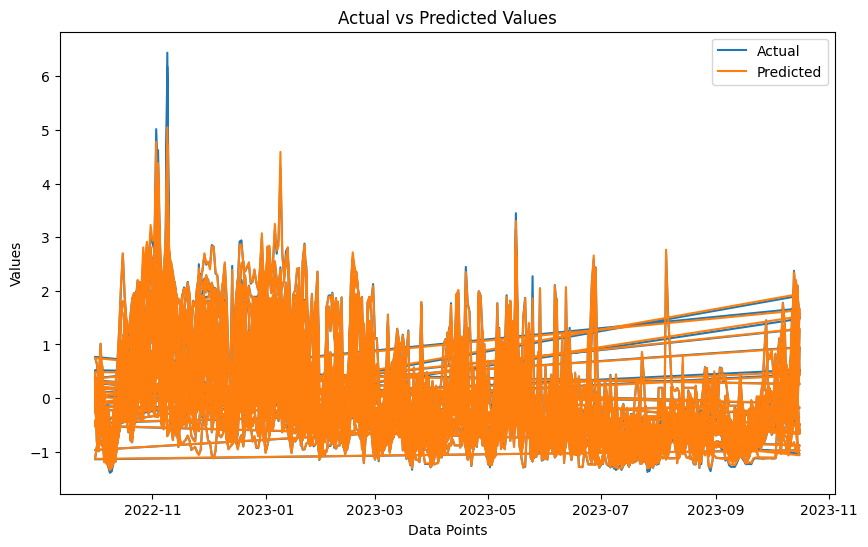

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index,y_test, label='Actual')
plt.plot(y_test.index,predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()

**Making Dataframe of predictions**

In [ ]:
predicted_df = pd.DataFrame({'Predicted_AQI': predictions}, index=X_test.index)

# Concatenate one-hot encoded State and City columns to the predicted DataFrame
predicted_df = pd.concat([predicted_df, X_test.filter(like='State_'), X_test.filter(like='City_')], axis=1)



In [ ]:
# Mean and standard daviation of the original AQI column
mean_AQI = 142.253383
std_AQI = 91.35

# Reverse the standard scaling to get back the original values
predicted_df['Predicted_AQI_Original'] = predicted_df['Predicted_AQI'] * std_AQI + mean_AQI


In [ ]:
y_test_df = pd.DataFrame({'Actual_AQI': y_test})
# Mean and standard daviation of the original AQI column
mean_AQI = 142.253383
std_AQI = 91.35

# Reverse the standard scaling to get back the original values
y_test_df['Actual_AQI'] = y_test_df['Actual_AQI'] * std_AQI + mean_AQI



In [ ]:
predicted_df['Original_AQI'] = y_test_df

In [ ]:
# Drop the 'Predicted_AQI' column in-place
predicted_df.drop('Predicted_AQI', axis=1, inplace=True)

In [ ]:
predicted_df

State_Delhi  State_Haryana  State_Punjab  City_Ambala  \
Recorded_Date                                                          
2022-10-01               0              1             0            0   
2022-10-02               0              1             0            0   
2022-10-03               0              1             0            0   
2022-10-04               0              1             0            0   
2022-10-05               0              1             0            0   
...                    ...            ...           ...          ...   
2023-10-12               0              1             0            0   
2023-10-13               0              1             0            0   
2023-10-14               0              1             0            0   
2023-10-15               0              1             0            0   
2023-10-16               0              1             0            0   

               City_Amritsar  City_Bahadurgarh  City_Ballabgarh  \
Recorded_Date                                                     
2022-10-01                 0                 1                0   
2022-10-02                 0                 1                0   
2022-10-03                 0                 1                0   
2022-10-04                 0                 1                0   
2022-10-05                 0                 1                0   
...                      ...               ...              ...   
2023-10-12                 0                 0                0   
2023-10-13                 0                 0                0   
2023-10-14                 0                 0                0   
2023-10-15                 0                 0                0   
2023-10-16                 0                 0                0   

               City_Bathinda  City_Bhiwani  City_Delhi  ...  \
Recorded_Date                                           ...   
2022-10-01                 0             0           0  ...   
2022-10-02                 0             0           0  ...   
2022-10-03                 0             0           0  ...   
2022-10-04                 0             0           0  ...   
2022-10-05                 0             0           0  ...   
...                      ...           ...         ...  ...   
2023-10-12                 0             0           0  ...   
2023-10-13                 0             0           0  ...   
2023-10-14                 0             0           0  ...   
2023-10-15                 0             0           0  ...   
2023-10-16                 0             0           0  ...   

               City_Kurukshetra   City_Ludhiana  City_Mandikhera  \
Recorded_Date                                                      
2022-10-01                     0              0                0   
2022-10-02                     0              0                0   
2022-10-03                     0              0                0   
2022-10-04                     0              0                0   
2022-10-05                     0              0                0   
...                          ...            ...              ...   
2023-10-12                     0              0                0   
2023-10-13                     0              0                0   
2023-10-14                     0              0                0   
2023-10-15                     0              0                0   
2023-10-16                     0              0                0   

               City_Manesar  City_Palwal  City_Rupnagar  City_Sirsa  \
Recorded_Date                                                         
2022-10-01                0            0              0           0   
2022-10-02                0            0              0           0   
2022-10-03                0            0              0           0   
2022-10-04                0            0              0           0   
2022-10-05                0            0              0           0   
... 

In [ ]:
state_columns = ['State_Delhi', 'State_Haryana', 'State_Punjab']
city_columns = ['City_Ambala', 'City_Amritsar', 'City_Bahadurgarh', 'City_Ballabgarh', 'City_Bathinda', 'City_Bhiwani', 'City_Delhi', 'City_Dharuhera', 'City_Fatehabad', 'City_Hisar', 'City_Jalandhar', 'City_Jind', 'City_Karnal', 'City_Khanna', 'City_Kurukshetra ', 'City_Ludhiana', 'City_Mandikhera', 'City_Manesar', 'City_Palwal', 'City_Rupnagar', 'City_Sirsa', 'City_Yamuna Nagar']

# Reverse one-hot encoding for 'State' and 'City'
predicted_df['Reconstructed_State'] = predicted_df[state_columns].idxmax(axis=1).str.replace('State_', '')
predicted_df['Reconstructed_City'] = predicted_df[city_columns].idxmax(axis=1).str.replace('City_', '')

# Drop the one-hot encoded columns
predicted_df.drop(columns=state_columns + city_columns, inplace=True)

# Display the resulting DataFrame
predicted_df


Predicted_AQI_Original  Original_AQI Reconstructed_State  \
Recorded_Date                                                             
2022-10-01                 175.841086    176.832082             Haryana   
2022-10-02                 143.065176    144.499919             Haryana   
2022-10-03                  95.109494     93.051781             Haryana   
2022-10-04                 108.810281    108.421225             Haryana   
2022-10-05                 131.485567    132.733678             Haryana   
...                               ...           ...                 ...   
2023-10-12                 117.829702    116.640927             Haryana   
2023-10-13                 118.592921    118.700853             Haryana   
2023-10-14                 110.415607    110.247825             Haryana   
2023-10-15                 101.044393    101.348147             Haryana   
2023-10-16                  95.779209     96.301663             Haryana   

              Reconstructed_City  
Recorded_Date                     
2022-10-01           Bahadurgarh  
2022-10-02           Bahadurgarh  
2022-10-03           Bahadurgarh  
2022-10-04           Bahadurgarh  
2022-10-05           Bahadurgarh  
...                          ...  
2023-10-12                 Hisar  
2023-10-13                 Hisar  
2023-10-14                 Hisar  
2023-10-15                 Hisar  
2023-10-16                 Hisar  

[8159 rows x 4 columns]

In [ ]:
predicted_df.to_excel('PredictedVSactual_CatBosst.xlsx')

In [ ]:
predicted_df['Original_AQI']

Recorded_Date
2022-10-01    176.832082
2022-10-02    144.499919
2022-10-03     93.051781
2022-10-04    108.421225
2022-10-05    132.733678
                 ...    
2023-10-12    116.640927
2023-10-13    118.700853
2023-10-14    110.247825
2023-10-15    101.348147
2023-10-16     96.301663
Name: Original_AQI, Length: 8159, dtype: float64

# Hypertuning CatBoost

In [ ]:
param_grid = {
    'depth': [3, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 300, 500],
    'loss_function':['RMSE'],
    'random_seed':[42]
}

In [ ]:
# Create a GridSearchCV object
grid_search = GridSearchCV(catboost_model, param_grid, scoring='r2')

In [ ]:
# Fit the model to the training data
grid_search.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
0:	learn: 1.0084303	total: 11.1ms	remaining: 5.53s
1:	learn: 0.9622908	total: 22.9ms	remaining: 5.7s
2:	learn: 0.9175791	total: 34.7ms	remaining: 5.75s
3:	learn: 0.8755275	total: 46.7ms	remaining: 5.79s
4:	learn: 0.8372987	total: 58.3ms	remaining: 5.77s
5:	learn: 0.7993659	total: 70ms	remaining: 5.76s
6:	learn: 0.7633539	total: 81.2ms	remaining: 5.72s
7:	learn: 0.7295867	total: 92.3ms	remaining: 5.67s
8:	learn: 0.6962729	total: 104ms	remaining: 5.65s
9:	learn: 0.6655832	total: 115ms	remaining: 5.63s
10:	learn: 0.6369936	total: 126ms	remaining: 5.61s
11:	learn: 0.6080730	total: 137ms	remaining: 5.58s
12:	learn: 0.5815004	total: 148ms	remaining: 5.54s
13:	learn: 0.5553064	total: 159ms	remaining: 5.51s
14:	learn: 0.5313528	total: 170ms	remaining: 5.49s
15:	learn: 0.5083410	total: 186ms	remaining: 5.64s
16:	learn: 0.4868625	total: 197ms	remaining: 5.59s
17:	learn: 0.4653326	total: 210ms	remaining: 5.61s
18:	learn: 0.4456405	total: 230ms	re

GridSearchCV(estimator=<catboost.core.CatBoostRegressor object at 0x79790121d9c0>,
             param_grid={'depth': [3, 6, 8], 'iterations': [100, 300, 500],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'loss_function': ['RMSE'], 'random_seed': [42]},
             scoring='r2')

In [ ]:
# Get the best parameters and the best model
best_params_catboost = grid_search.best_params_
best_catboost_model = grid_search.best_estimator_
print(f'Best Parameters: {best_params_catboost}')
print(f'Best Catboost model: {best_catboost_model}')

Best Parameters: {'depth': 6, 'iterations': 500, 'learning_rate': 0.1, 'loss_function': 'RMSE', 'random_seed': 42}
Best Catboost model: <catboost.core.CatBoostRegressor object at 0x7979042dd210>


In [ ]:
# Create and train the CatBoostRegressor model
catboost_model = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.1, loss_function='RMSE', random_seed=42)

In [ ]:
catboost_model.fit(X_train, y_train, verbose=100)


0:	learn: 0.9348608	total: 7.94ms	remaining: 3.96s
100:	learn: 0.0575139	total: 672ms	remaining: 2.65s
200:	learn: 0.0402754	total: 1.31s	remaining: 1.95s
300:	learn: 0.0320855	total: 1.97s	remaining: 1.3s
400:	learn: 0.0272693	total: 2.61s	remaining: 644ms
499:	learn: 0.0239279	total: 3.23s	remaining: 0us


In [ ]:
# Make predictions on the test set
predictions = catboost_model.predict(X_test)


CatBoost Model Evaluation after  Hyperperameters

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Route Mean Squared Error: {rmse}")

Mean Squared Error: 0.0012617440448522673
Route Mean Squared Error: 0.035521036652275045


In [ ]:
# Evaluate the model using R-squared
r2 = r2_score(y_test, predictions)

print(f"R-squared (R2): {r2}")

R-squared (R2): 0.9983735153629382


In [ ]:
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.016015981212102574


In [ ]:
evs = explained_variance_score(y_test, predictions)
print(f"explained_variance_score: {evs}")


explained_variance_score: 0.9983736008012566


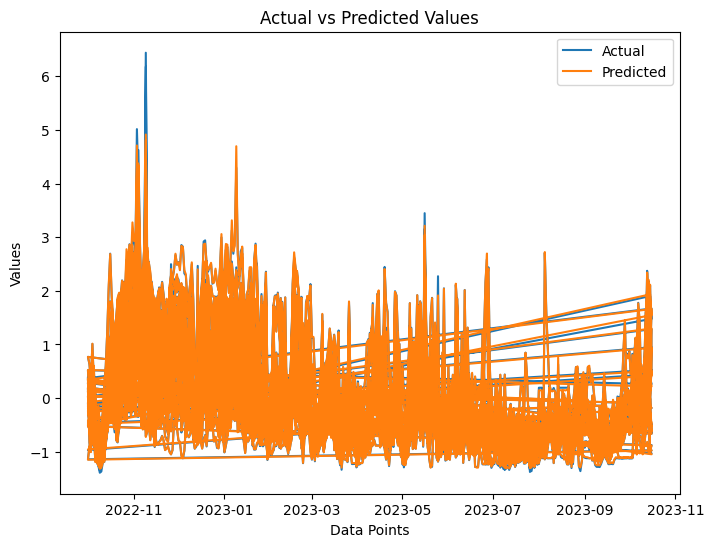

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.plot(y_test.index,y_test, label='Actual')
plt.plot(y_test.index,predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()

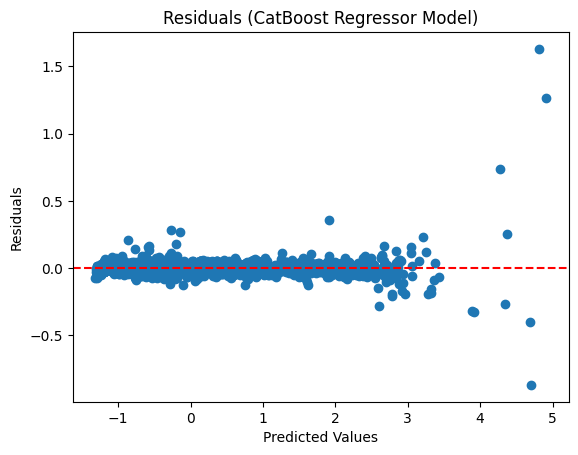

In [ ]:
residuals_catboost = y_test - predictions
plt.scatter(predictions, residuals_catboost)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title("Residuals (CatBoost Regressor Model)")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

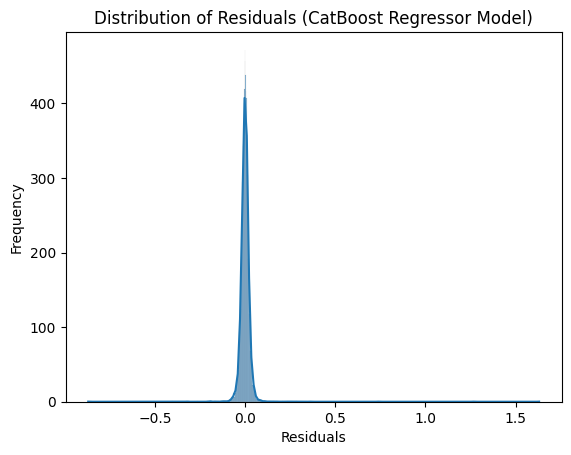

In [ ]:
import seaborn as sns

sns.histplot(residuals_catboost, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (CatBoost Regressor Model)")
plt.show()

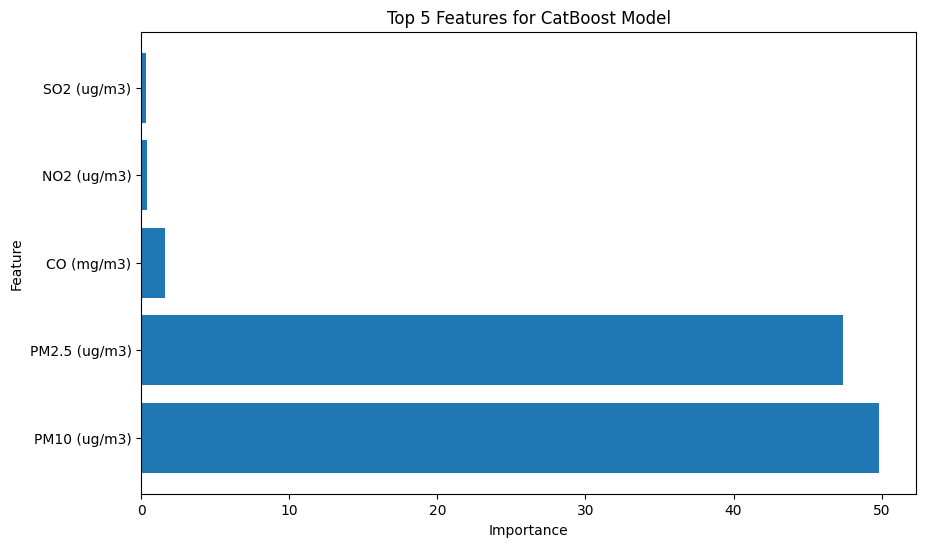

In [ ]:
# Get feature importance
feature_importance = catboost_model.get_feature_importance(prettified=True)

# Select the top 5 features
top_features = feature_importance.head(5)

# Create a bar plot for top 5 feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature Id'], top_features['Importances'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Features for CatBoost Model')
plt.show()

Testing example

# XGBoost model

In [ ]:
from xgboost import XGBRegressor
# Initialize XGBoost model
xgb_model = XGBRegressor()

In [ ]:
# Fit the model to the training data
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make predictions on the test set
predictions = xgb_model.predict(X_test)

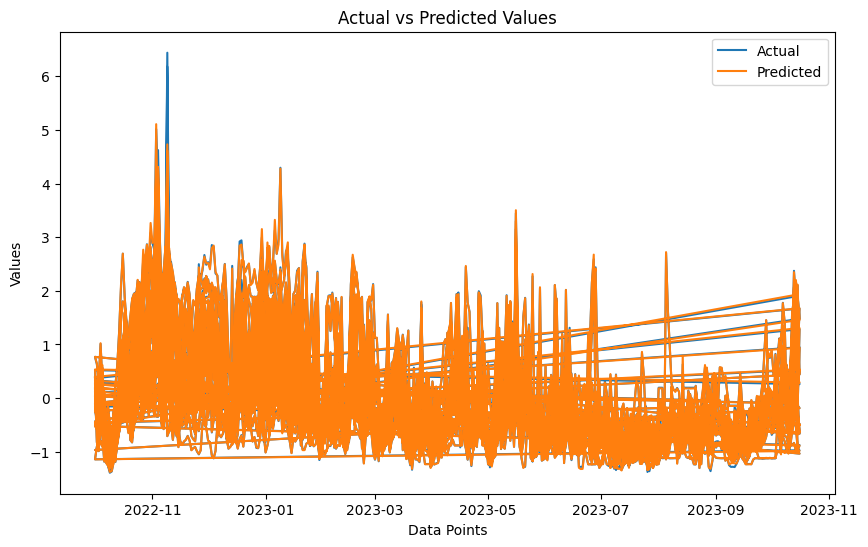

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index,y_test, label='Actual')
plt.plot(y_test.index,predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
# Calculate root mean squared error
rmse = np.sqrt(mse)

# Display the result
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error: 0.001260211356467745
Root Mean Squared Error (RMSE): 0.03549945572072542


In [ ]:
# Evaluate the model using R-squared
r2 = r2_score(y_test, predictions)

print(f"R-squared (R2): {r2}")

R-squared (R2): 0.9983754911155648


In [ ]:
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.01025162579781646


In [ ]:
evs = explained_variance_score(y_test, predictions)
print(f"explained_variance_score: {evs}")

explained_variance_score: 0.9983756353859117


**Predictions Dataframe XGBRegressor**

In [ ]:
predicted_XGB_df = pd.DataFrame({'Predicted_AQI': predictions}, index=X_test.index)

# Concatenate one-hot encoded State and City columns to the predicted DataFrame
predicted_XGB_df = pd.concat([predicted_XGB_df, X_test.filter(like='State_'), X_test.filter(like='City_')], axis=1)



In [ ]:
mean_AQI = 142.253383
std_AQI = 91.35

# Reverse the standard scaling to get back the original values
predicted_XGB_df['Predicted_AQI_Original'] = predicted_XGB_df['Predicted_AQI'] * std_AQI + mean_AQI


In [ ]:
y_test_df = pd.DataFrame({'Actual_AQI': y_test})

mean_AQI = 142.253383
std_AQI = 91.35

# Reverse the standard scaling to get back the original values
y_test_df['Actual_AQI'] = y_test_df['Actual_AQI'] * std_AQI + mean_AQI


In [ ]:

predicted_XGB_df['Original_AQI'] = y_test_df

In [ ]:
# Drop the 'Predicted_AQI' column in-place
predicted_XGB_df.drop('Predicted_AQI', axis=1, inplace=True)

In [ ]:
predicted_XGB_df

State_Delhi  State_Haryana  State_Punjab  City_Ambala  \
Recorded_Date                                                          
2022-10-01               0              1             0            0   
2022-10-02               0              1             0            0   
2022-10-03               0              1             0            0   
2022-10-04               0              1             0            0   
2022-10-05               0              1             0            0   
...                    ...            ...           ...          ...   
2023-10-12               0              1             0            0   
2023-10-13               0              1             0            0   
2023-10-14               0              1             0            0   
2023-10-15               0              1             0            0   
2023-10-16               0              1             0            0   

               City_Amritsar  City_Bahadurgarh  City_Ballabgarh  \
Recorded_Date                                                     
2022-10-01                 0                 1                0   
2022-10-02                 0                 1                0   
2022-10-03                 0                 1                0   
2022-10-04                 0                 1                0   
2022-10-05                 0                 1                0   
...                      ...               ...              ...   
2023-10-12                 0                 0                0   
2023-10-13                 0                 0                0   
2023-10-14                 0                 0                0   
2023-10-15                 0                 0                0   
2023-10-16                 0                 0                0   

               City_Bathinda  City_Bhiwani  City_Delhi  ...  \
Recorded_Date                                           ...   
2022-10-01                 0             0           0  ...   
2022-10-02                 0             0           0  ...   
2022-10-03                 0             0           0  ...   
2022-10-04                 0             0           0  ...   
2022-10-05                 0             0           0  ...   
...                      ...           ...         ...  ...   
2023-10-12                 0             0           0  ...   
2023-10-13                 0             0           0  ...   
2023-10-14                 0             0           0  ...   
2023-10-15                 0             0           0  ...   
2023-10-16                 0             0           0  ...   

               City_Kurukshetra   City_Ludhiana  City_Mandikhera  \
Recorded_Date                                                      
2022-10-01                     0              0                0   
2022-10-02                     0              0                0   
2022-10-03                     0              0                0   
2022-10-04                     0              0                0   
2022-10-05                     0              0                0   
...                          ...            ...              ...   
2023-10-12                     0              0                0   
2023-10-13                     0              0                0   
2023-10-14                     0              0                0   
2023-10-15                     0              0                0   
2023-10-16                     0              0                0   

               City_Manesar  City_Palwal  City_Rupnagar  City_Sirsa  \
Recorded_Date                                                         
2022-10-01                0            0              0           0   
2022-10-02                0            0              0           0   
2022-10-03                0            0              0           0   
2022-10-04                0            0              0           0   
2022-10-05                0            0              0           0   
... 

In [ ]:
state_columns = ['State_Delhi', 'State_Haryana', 'State_Punjab']
city_columns = ['City_Ambala', 'City_Amritsar', 'City_Bahadurgarh', 'City_Ballabgarh', 'City_Bathinda', 'City_Bhiwani', 'City_Delhi', 'City_Dharuhera', 'City_Fatehabad', 'City_Hisar', 'City_Jalandhar', 'City_Jind', 'City_Karnal', 'City_Khanna', 'City_Kurukshetra ', 'City_Ludhiana', 'City_Mandikhera', 'City_Manesar', 'City_Palwal', 'City_Rupnagar', 'City_Sirsa', 'City_Yamuna Nagar']

# Reverse one-hot encoding for 'State' and 'City'
predicted_XGB_df['Reconstructed_State'] = predicted_XGB_df[state_columns].idxmax(axis=1).str.replace('State_', '')
predicted_XGB_df['Reconstructed_City'] = predicted_XGB_df[city_columns].idxmax(axis=1).str.replace('City_', '')

# Drop the one-hot encoded columns
predicted_XGB_df.drop(columns=state_columns + city_columns, inplace=True)

# Display the resulting DataFrame
predicted_XGB_df


Predicted_AQI_Original  Original_AQI Reconstructed_State  \
Recorded_Date                                                             
2022-10-01                 178.027237    176.832082             Haryana   
2022-10-02                 144.677856    144.499919             Haryana   
2022-10-03                  93.010590     93.051781             Haryana   
2022-10-04                 107.783142    108.421225             Haryana   
2022-10-05                 131.822479    132.733678             Haryana   
...                               ...           ...                 ...   
2023-10-12                 116.123993    116.640927             Haryana   
2023-10-13                 119.456192    118.700853             Haryana   
2023-10-14                 109.914429    110.247825             Haryana   
2023-10-15                 101.669250    101.348147             Haryana   
2023-10-16                  96.531967     96.301663             Haryana   

              Reconstructed_City  
Recorded_Date                     
2022-10-01           Bahadurgarh  
2022-10-02           Bahadurgarh  
2022-10-03           Bahadurgarh  
2022-10-04           Bahadurgarh  
2022-10-05           Bahadurgarh  
...                          ...  
2023-10-12                 Hisar  
2023-10-13                 Hisar  
2023-10-14                 Hisar  
2023-10-15                 Hisar  
2023-10-16                 Hisar  

[8159 rows x 4 columns]

In [ ]:
predicted_XGB_df.to_excel('PredictedVSactual_XGBReggressor.xlsx')

 **Hypertuning XGB**

In [ ]:
# Define the parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 8]
}

In [ ]:
# Create a GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, scoring='r2')

In [ ]:
# Fit the model to the training data
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 8],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [ ]:
# Get the best parameters and the best model
best_params_xgb = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_
print(f'Best Parameters: {best_params_xgb}')
print(f'best XGB Model: {best_xgb_model}')

Best Parameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300}
best XGB Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [ ]:
# Initialize XGBoost model
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=8, random_state=42)


In [ ]:
# Train the model
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions on the test set
predictions = xgb_model.predict(X_test)


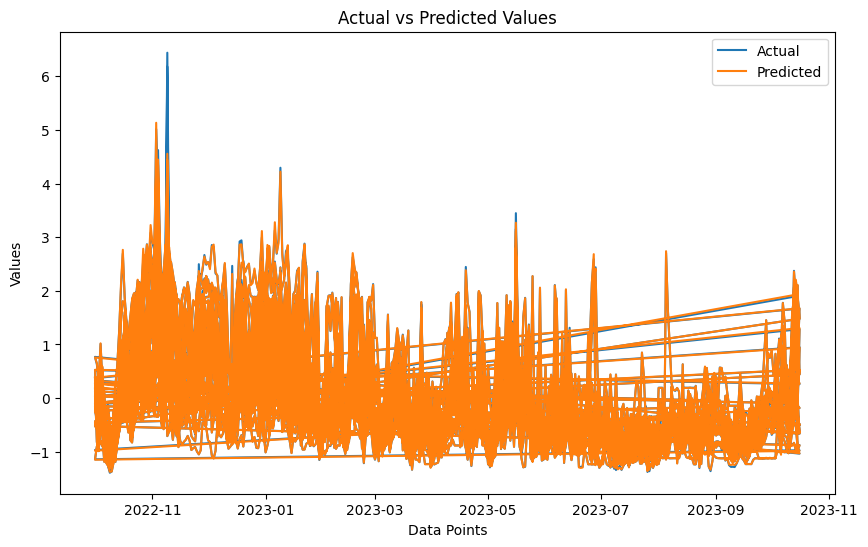

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index,y_test, label='Actual')
plt.plot(y_test.index,predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
# Calculate root mean squared error
rmse = np.sqrt(mse)

# Display the result
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error: 0.0012839023690747044
Root Mean Squared Error (RMSE): 0.03583158340172402


In [ ]:
# Evaluate the model using R-squared
r2 = r2_score(y_test, predictions)

print(f"R-squared (R2): {r2}")

R-squared (R2): 0.9983449515872042


In [ ]:
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.007062130087997919


In [ ]:
evs = explained_variance_score(y_test, predictions)
print(f"explained_variance_score: {evs}")

explained_variance_score: 0.9983455036751069


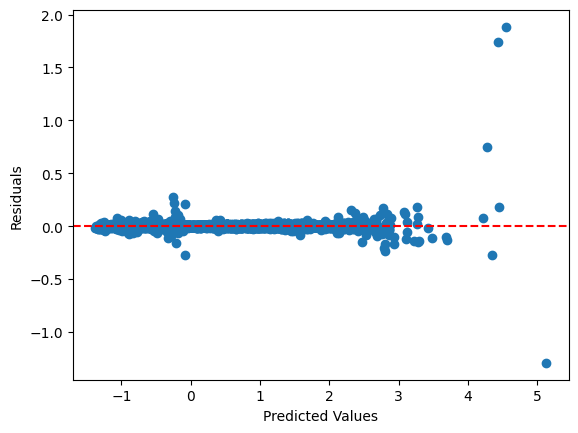

In [ ]:
residuals_xgb = y_test - predictions
plt.scatter(predictions, residuals_xgb)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

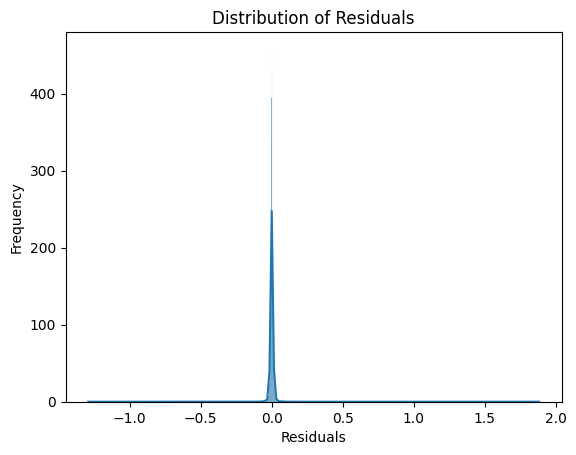

In [ ]:
import seaborn as sns

sns.histplot(residuals_xgb, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

# **RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Initialize Random Forest regressor model
rf_model = RandomForestRegressor()

In [ ]:
# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Make predictions on the test set
predictions = rf_model.predict(X_test)


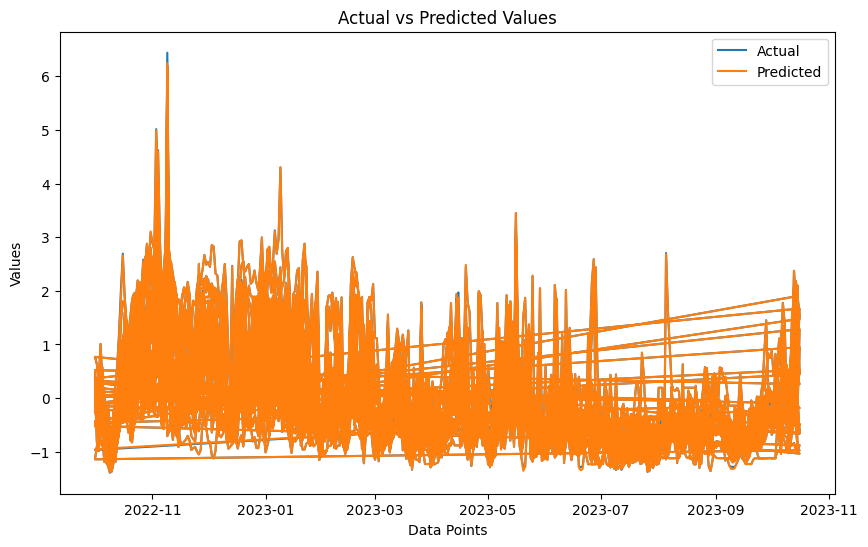

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index,y_test, label='Actual')
plt.plot(y_test.index,predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()

**Performance matrix**

In [ ]:
# Evaluate the model using regression metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

rmse = np.sqrt(mse)

# Display the result

print(f"Mean Squared Error (MSE): {mse}")
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.0001217238413435168
Root Mean Squared Error (RMSE): 0.011032852819806706
R-squared (R2): 0.999843088652792


In [ ]:
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.0017966868268087261


In [ ]:
evs = explained_variance_score(y_test, predictions)
print(f"explained_variance_score: {evs}")

explained_variance_score: 0.9998434196705206


**Predictions Dataframe XGBRegressor**

In [ ]:
predicted_RF_df = pd.DataFrame({'Predicted_AQI': predictions}, index=X_test.index)

# Concatenate one-hot encoded State and City columns to the predicted DataFrame
predicted_RF_df = pd.concat([predicted_RF_df, X_test.filter(like='State_'), X_test.filter(like='City_')], axis=1)

In [ ]:
# Assuming mean_AQI and std_AQI are the mean and standard deviation of the original AQI column
mean_AQI = 142.253383
std_AQI = 91.35

# Reverse the standard scaling to get back the original values
predicted_RF_df['Predicted_AQI_Original'] = predicted_RF_df['Predicted_AQI'] * std_AQI + mean_AQI


In [ ]:
y_test_df = pd.DataFrame({'Actual_AQI': y_test})
# Assuming mean_AQI and std_AQI are the mean and standard deviation of the original AQI column
mean_AQI = 142.253383
std_AQI = 91.35

# Reverse the standard scaling to get back the original values
y_test_df['Actual_AQI'] = y_test_df['Actual_AQI'] * std_AQI + mean_AQI



In [ ]:

predicted_RF_df['Original_AQI'] = y_test_df

In [ ]:
# Drop the 'Predicted_AQI' column in-place
predicted_RF_df.drop('Predicted_AQI', axis=1, inplace=True)

In [ ]:
predicted_RF_df

State_Delhi  State_Haryana  State_Punjab  City_Ambala  \
Recorded_Date                                                          
2022-10-01               0              1             0            0   
2022-10-02               0              1             0            0   
2022-10-03               0              1             0            0   
2022-10-04               0              1             0            0   
2022-10-05               0              1             0            0   
...                    ...            ...           ...          ...   
2023-10-12               0              1             0            0   
2023-10-13               0              1             0            0   
2023-10-14               0              1             0            0   
2023-10-15               0              1             0            0   
2023-10-16               0              1             0            0   

               City_Amritsar  City_Bahadurgarh  City_Ballabgarh  \
Recorded_Date                                                     
2022-10-01                 0                 1                0   
2022-10-02                 0                 1                0   
2022-10-03                 0                 1                0   
2022-10-04                 0                 1                0   
2022-10-05                 0                 1                0   
...                      ...               ...              ...   
2023-10-12                 0                 0                0   
2023-10-13                 0                 0                0   
2023-10-14                 0                 0                0   
2023-10-15                 0                 0                0   
2023-10-16                 0                 0                0   

               City_Bathinda  City_Bhiwani  City_Delhi  ...  \
Recorded_Date                                           ...   
2022-10-01                 0             0           0  ...   
2022-10-02                 0             0           0  ...   
2022-10-03                 0             0           0  ...   
2022-10-04                 0             0           0  ...   
2022-10-05                 0             0           0  ...   
...                      ...           ...         ...  ...   
2023-10-12                 0             0           0  ...   
2023-10-13                 0             0           0  ...   
2023-10-14                 0             0           0  ...   
2023-10-15                 0             0           0  ...   
2023-10-16                 0             0           0  ...   

               City_Kurukshetra   City_Ludhiana  City_Mandikhera  \
Recorded_Date                                                      
2022-10-01                     0              0                0   
2022-10-02                     0              0                0   
2022-10-03                     0              0                0   
2022-10-04                     0              0                0   
2022-10-05                     0              0                0   
...                          ...            ...              ...   
2023-10-12                     0              0                0   
2023-10-13                     0              0                0   
2023-10-14                     0              0                0   
2023-10-15                     0              0                0   
2023-10-16                     0              0                0   

               City_Manesar  City_Palwal  City_Rupnagar  City_Sirsa  \
Recorded_Date                                                         
2022-10-01                0            0              0           0   
2022-10-02                0            0              0           0   
2022-10-03                0            0              0           0   
2022-10-04                0            0              0           0   
2022-10-05                0            0              0           0   
... 

In [ ]:


state_columns = ['State_Delhi', 'State_Haryana', 'State_Punjab']
city_columns = ['City_Ambala', 'City_Amritsar', 'City_Bahadurgarh', 'City_Ballabgarh', 'City_Bathinda', 'City_Bhiwani', 'City_Delhi', 'City_Dharuhera', 'City_Fatehabad', 'City_Hisar', 'City_Jalandhar', 'City_Jind', 'City_Karnal', 'City_Khanna', 'City_Kurukshetra ', 'City_Ludhiana', 'City_Mandikhera', 'City_Manesar', 'City_Palwal', 'City_Rupnagar', 'City_Sirsa', 'City_Yamuna Nagar']

# Reverse one-hot encoding for 'State' and 'City'
predicted_RF_df['Reconstructed_State'] = predicted_RF_df[state_columns].idxmax(axis=1).str.replace('State_', '')
predicted_RF_df['Reconstructed_City'] = predicted_RF_df[city_columns].idxmax(axis=1).str.replace('City_', '')

# Drop the one-hot encoded columns
predicted_RF_df.drop(columns=state_columns + city_columns, inplace=True)

# Display the resulting DataFrame
predicted_RF_df


Predicted_AQI_Original  Original_AQI Reconstructed_State  \
Recorded_Date                                                             
2022-10-01                 176.840368    176.832082             Haryana   
2022-10-02                 144.585647    144.499919             Haryana   
2022-10-03                  93.047581     93.051781             Haryana   
2022-10-04                 108.444690    108.421225             Haryana   
2022-10-05                 132.730012    132.733678             Haryana   
...                               ...           ...                 ...   
2023-10-12                 116.639018    116.640927             Haryana   
2023-10-13                 118.708119    118.700853             Haryana   
2023-10-14                 110.249573    110.247825             Haryana   
2023-10-15                 101.362147    101.348147             Haryana   
2023-10-16                  96.287764     96.301663             Haryana   

              Reconstructed_City  
Recorded_Date                     
2022-10-01           Bahadurgarh  
2022-10-02           Bahadurgarh  
2022-10-03           Bahadurgarh  
2022-10-04           Bahadurgarh  
2022-10-05           Bahadurgarh  
...                          ...  
2023-10-12                 Hisar  
2023-10-13                 Hisar  
2023-10-14                 Hisar  
2023-10-15                 Hisar  
2023-10-16                 Hisar  

[8159 rows x 4 columns]

In [ ]:
predicted_RF_df.to_excel('PredictedVSactual_RFReggressor.xlsx')

**Hypertuning RandomForestR**

In [ ]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6, 8],
    'max_features': ['sqrt', 'log2'],
    'random_state': [42]
}

In [ ]:
# Create a GridSearchCV object
grid_search = GridSearchCV(rf_model,param_grid,scoring='r2')

In [ ]:
# Fit the model to the training data
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 500],
                         'random_state': [42]},
             scoring='r2')

In [ ]:
# Get the best parameters and the best model
best_params_rf = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
print(f'Best Parameters: {best_params_rf}')
print(f'best Random Forest Model: {best_rf_model}')

Best Parameters: {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}
best Random Forest Model: RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=200,
                      random_state=42)


In [ ]:
# Initialize Random Forest regressor model
rf_model = RandomForestRegressor(max_depth= 8,n_estimators=200,max_features= 'auto', random_state=42)


In [ ]:
# Train the model
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=8, max_features='auto', n_estimators=200,
                      random_state=42)

In [ ]:
# Make predictions on the test set
predictions = rf_model.predict(X_test)


# **Performance Matrix after Hypertuning**

In [ ]:
# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

# Display the result
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 0.032521479448997755
Mean Squared Error (MSE): 0.0010576466255515834
R-squared (R2): 0.9986366125563118


In [ ]:
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.015084240115464562


In [ ]:
evs = explained_variance_score(y_test, predictions)
print(f"explained_variance_score: {evs}")

explained_variance_score: 0.9986366238756661


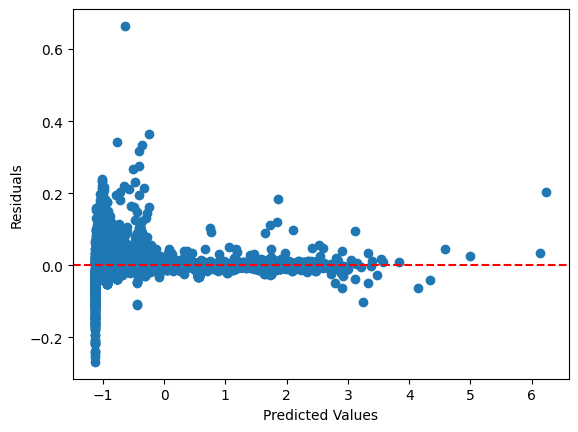

In [ ]:
residuals_rf = y_test - predictions
plt.scatter(predictions, residuals_rf)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

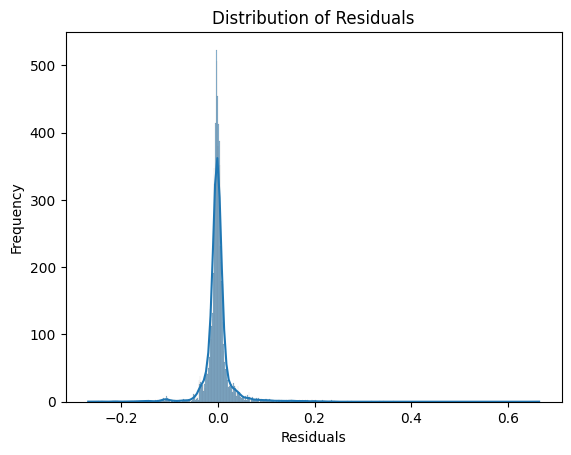

In [ ]:
import seaborn as sns

sns.histplot(residuals_rf, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

# Lasso regression

In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()


In [ ]:
# Define the parameter grid for Lasso
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

In [ ]:
# Create a GridSearchCV object
grid_search = GridSearchCV(lasso_model,param_grid,scoring='r2',cv=5)


In [ ]:
# Fit the model to the training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}, scoring='r2')

In [ ]:
# Get the best parameters and the best model
best_params_lasso = grid_search.best_params_
best_lasso_model = grid_search.best_estimator_
print(f'Best Parameters: {best_params_lasso}')
print(f'Best Lasso Model: {best_lasso_model}')

Best Parameters: {'alpha': 0.001}
Best Lasso Model: Lasso(alpha=0.001)


In [ ]:
# Create and fit a Lasso regression model
lasso_model = Lasso(alpha=0.001)


In [ ]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.001)

In [ ]:
# Make predictions on the test set
predictions = lasso_model.predict(X_test)


In [ ]:
# Evaluate the model by calculating MAE, RMSE, and MAPE
print("Lasso Regression Results:")
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error (RMSE):", rmse)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)


Lasso Regression Results:
Mean Absolute Error (MAE): 0.16777986387669516
Mean Squared Error: 0.055670711969935664
Root Mean Squared Error (RMSE): 0.2359464175823309
Mean Absolute Percentage Error (MAPE): 5359.016387285205
R-squared: 0.9282361917040015


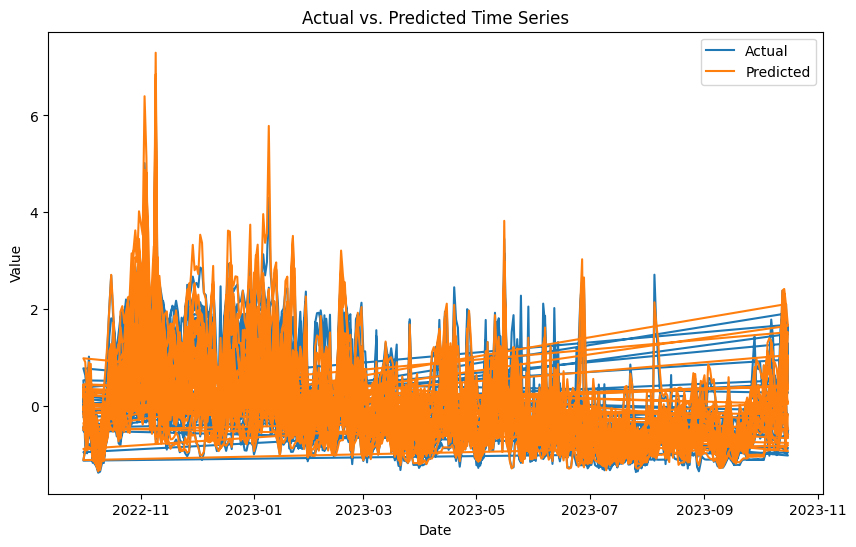

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Time Series')
plt.legend()
plt.show()

# AdaBoost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Create a DecisionTreeRegressor as the base learner
base_model = DecisionTreeRegressor(max_depth=3)


In [ ]:
# Create the AdaBoostRegressor
adaboost_model = AdaBoostRegressor(base_model, n_estimators=500, learning_rate=0.1, random_state=42)


In [ ]:
# Train the model
adaboost_model.fit(X_train, y_train)


AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.1, n_estimators=500, random_state=42)

In [ ]:
# Make predictions on the test set
predictions = adaboost_model.predict(X_test)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.0442662622581396


In [ ]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.21039549010884145


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.17454636063928503


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

R-squared: 0.9429374001828992


In [ ]:
from sklearn.metrics import explained_variance_score

evs = explained_variance_score(y_test, predictions)
print(f'Explained Variance Score: {evs}')

Explained Variance Score: 0.9613296157385643


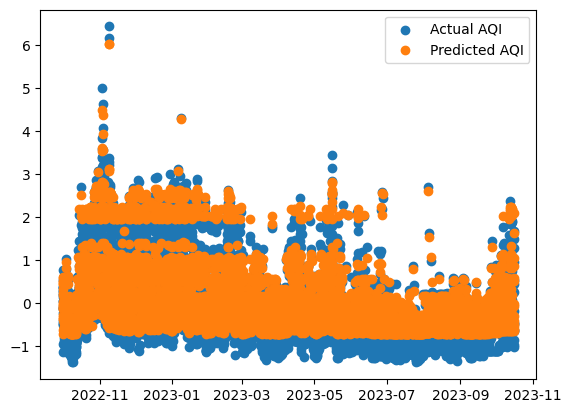

In [ ]:
# Plot actual vs. predicted values
plt.scatter(y_test.index, y_test, label='Actual AQI')
plt.scatter(y_test.index, predictions, label='Predicted AQI')
plt.legend()
plt.show()

# Support Vector Regressor

In [ ]:
# Import necessary libraries
from sklearn.svm import SVR

In [ ]:
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [ ]:
# Make predictions on the test set
predictions = svr_model.predict(X_test)

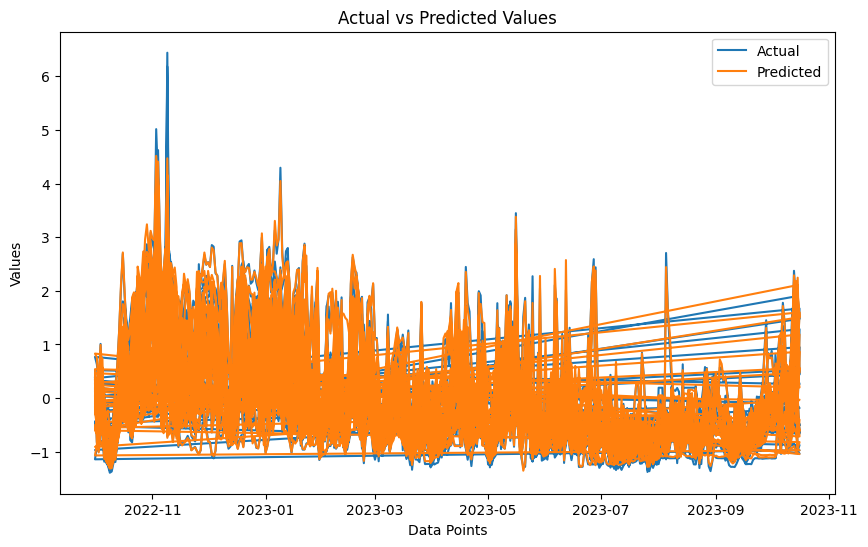

In [ ]:
# Plotting actual vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test.index,y_test, label='Actual')
plt.plot(y_test.index,predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()

**Performance Matrix Before Hypertuning**

In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.014887235755965683


In [ ]:
import numpy as np
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.12201326057427399


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.07613712722873556


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

R-squared: 0.9808092137670987


In [ ]:
from sklearn.metrics import explained_variance_score

evs = explained_variance_score(y_test, predictions)
print(f'Explained Variance Score: {evs}')

Explained Variance Score: 0.9808225301359879


**Hypertuning SVM**

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.1,1,10],
    'kernel': ['linear','rbf']

}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVR(), param_grid={'C': [10], 'kernel': ['rbf']},
             scoring='neg_mean_squared_error')

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}


In [ ]:
# Create the SVR model
svr_model = SVR(kernel='rbf', C=10)


In [ ]:
# Train the model
svr_model.fit(X_train, y_train)

SVR(C=10)

In [ ]:
# Make predictions on the test set
predictions = svr_model.predict(X_test)

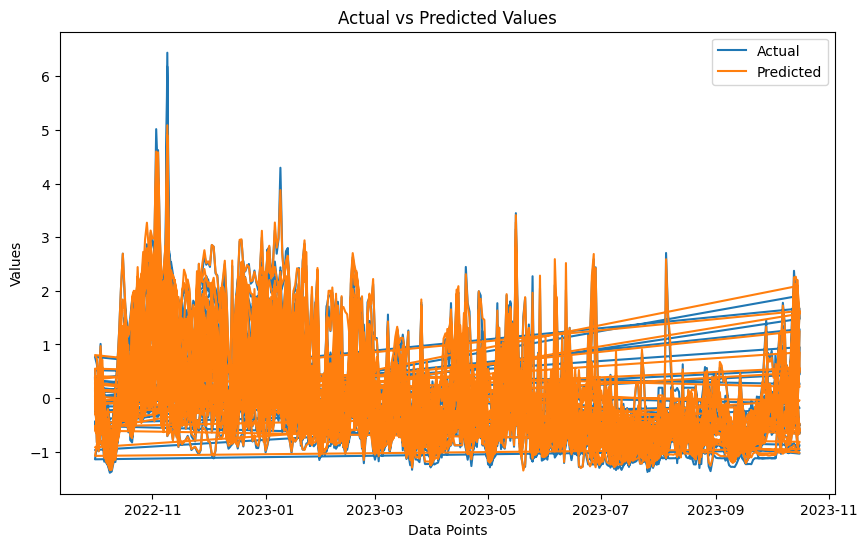

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index,y_test, label='Actual')
plt.plot(y_test.index,predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()

**Performance Matrix After Hypertuning**

In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.014194179793747394


In [ ]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.11913932933228806


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.07310282571111645


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

R-squared: 0.981702615943056


In [ ]:
from sklearn.metrics import explained_variance_score

evs = explained_variance_score(y_test, predictions)
print(f'Explained Variance Score: {evs}')

Explained Variance Score: 0.9817681247295704


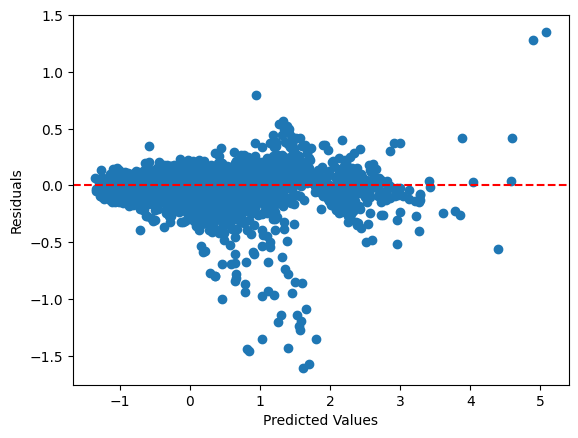

In [ ]:
residuals_rf = y_test - predictions
plt.scatter(predictions, residuals_rf)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

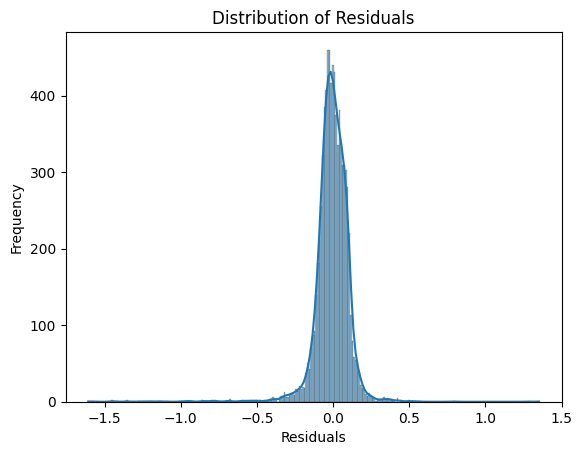

In [ ]:
import seaborn as sns

sns.histplot(residuals_rf, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

**Predictions Dataframe SVM**

In [ ]:
predicted_SVR = pd.DataFrame({'Predicted_AQI': predictions}, index=X_test.index)

# Concatenate one-hot encoded State and City columns to the predicted DataFrame
predicted_SVR = pd.concat([predicted_SVR, X_test.filter(like='State_'), X_test.filter(like='City_')], axis=1)

In [ ]:
# Assuming mean_AQI and std_AQI are the mean and standard deviation of the original AQI column
mean_AQI = 142.253383
std_AQI = 91.35

# Reverse the standard scaling to get back the original values
predicted_SVR['Predicted_AQI_Original'] = predicted_SVR['Predicted_AQI'] * std_AQI + mean_AQI


In [ ]:
y_test_df = pd.DataFrame({'Actual_AQI': y_test})
# Assuming mean_AQI and std_AQI are the mean and standard deviation of the original AQI column
mean_AQI = 142.253383
std_AQI = 91.35

# Reverse the standard scaling to get back the original values
y_test_df['Actual_AQI'] = y_test_df['Actual_AQI'] * std_AQI + mean_AQI



In [ ]:

predicted_SVR['Original_AQI'] = y_test_df

In [ ]:
# Drop the 'Predicted_AQI' column in-place
predicted_SVR.drop('Predicted_AQI', axis=1, inplace=True)

In [ ]:
predicted_SVR

State_Delhi  State_Haryana  State_Punjab  City_Ambala  \
Recorded_Date                                                          
2022-10-01               0              1             0            0   
2022-10-02               0              1             0            0   
2022-10-03               0              1             0            0   
2022-10-04               0              1             0            0   
2022-10-05               0              1             0            0   
...                    ...            ...           ...          ...   
2023-10-12               0              1             0            0   
2023-10-13               0              1             0            0   
2023-10-14               0              1             0            0   
2023-10-15               0              1             0            0   
2023-10-16               0              1             0            0   

               City_Amritsar  City_Bahadurgarh  City_Ballabgarh  \
Recorded_Date                                                     
2022-10-01                 0                 1                0   
2022-10-02                 0                 1                0   
2022-10-03                 0                 1                0   
2022-10-04                 0                 1                0   
2022-10-05                 0                 1                0   
...                      ...               ...              ...   
2023-10-12                 0                 0                0   
2023-10-13                 0                 0                0   
2023-10-14                 0                 0                0   
2023-10-15                 0                 0                0   
2023-10-16                 0                 0                0   

               City_Bathinda  City_Bhiwani  City_Delhi  ...  \
Recorded_Date                                           ...   
2022-10-01                 0             0           0  ...   
2022-10-02                 0             0           0  ...   
2022-10-03                 0             0           0  ...   
2022-10-04                 0             0           0  ...   
2022-10-05                 0             0           0  ...   
...                      ...           ...         ...  ...   
2023-10-12                 0             0           0  ...   
2023-10-13                 0             0           0  ...   
2023-10-14                 0             0           0  ...   
2023-10-15                 0             0           0  ...   
2023-10-16                 0             0           0  ...   

               City_Kurukshetra   City_Ludhiana  City_Mandikhera  \
Recorded_Date                                                      
2022-10-01                     0              0                0   
2022-10-02                     0              0                0   
2022-10-03                     0              0                0   
2022-10-04                     0              0                0   
2022-10-05                     0              0                0   
...                          ...            ...              ...   
2023-10-12                     0              0                0   
2023-10-13                     0              0                0   
2023-10-14                     0              0                0   
2023-10-15                     0              0                0   
2023-10-16                     0              0                0   

               City_Manesar  City_Palwal  City_Rupnagar  City_Sirsa  \
Recorded_Date                                                         
2022-10-01                0            0              0           0   
2022-10-02                0            0              0           0   
2022-10-03                0            0              0           0   
2022-10-04                0            0              0           0   
2022-10-05                0            0              0           0   
... 

In [ ]:
state_columns = ['State_Delhi', 'State_Haryana', 'State_Punjab']
city_columns = ['City_Ambala', 'City_Amritsar', 'City_Bahadurgarh', 'City_Ballabgarh', 'City_Bathinda', 'City_Bhiwani', 'City_Delhi', 'City_Dharuhera', 'City_Fatehabad', 'City_Hisar', 'City_Jalandhar', 'City_Jind', 'City_Karnal', 'City_Khanna', 'City_Kurukshetra ', 'City_Ludhiana', 'City_Mandikhera', 'City_Manesar', 'City_Palwal', 'City_Rupnagar', 'City_Sirsa', 'City_Yamuna Nagar']

# Reverse one-hot encoding for 'State' and 'City'
predicted_SVR['Reconstructed_State'] = predicted_SVR[state_columns].idxmax(axis=1).str.replace('State_', '')
predicted_SVR['Reconstructed_City'] = predicted_SVR[city_columns].idxmax(axis=1).str.replace('City_', '')

# Drop the one-hot encoded columns
predicted_SVR.drop(columns=state_columns + city_columns, inplace=True)

# Display the resulting DataFrame
predicted_SVR


Predicted_AQI_Original  Original_AQI Reconstructed_State  \
Recorded_Date                                                             
2022-10-01                 173.983708    176.832082             Haryana   
2022-10-02                 148.410305    144.499919             Haryana   
2022-10-03                  86.438436     93.051781             Haryana   
2022-10-04                 110.712357    108.421225             Haryana   
2022-10-05                 136.566160    132.733678             Haryana   
...                               ...           ...                 ...   
2023-10-12                 107.628161    116.640927             Haryana   
2023-10-13                 110.193916    118.700853             Haryana   
2023-10-14                 100.716619    110.247825             Haryana   
2023-10-15                  99.629357    101.348147             Haryana   
2023-10-16                  89.135254     96.301663             Haryana   

              Reconstructed_City  
Recorded_Date                     
2022-10-01           Bahadurgarh  
2022-10-02           Bahadurgarh  
2022-10-03           Bahadurgarh  
2022-10-04           Bahadurgarh  
2022-10-05           Bahadurgarh  
...                          ...  
2023-10-12                 Hisar  
2023-10-13                 Hisar  
2023-10-14                 Hisar  
2023-10-15                 Hisar  
2023-10-16                 Hisar  

[8159 rows x 4 columns]

In [ ]:
predicted_SVR.to_excel('PredictedVSactual_SVR.xlsx')

# **SARIMAX**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

In [ ]:
# Assuming 'State_Delhi' is a column in Air_Pollutants
df_delhi = Air_Pollutants[Air_Pollutants['State_Delhi'] == 1].copy()


In [ ]:
# Set the frequency to daily
df_delhi = df_delhi.asfreq('D')


In [ ]:
df_delhi

PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
Recorded_Date                                                         
2019-01-01          4.813315      3.948279    4.299459     2.626164   
2019-01-02          5.868390      4.635569    4.854490     3.091504   
2019-01-03          6.112489      4.589437    2.916067     2.301902   
2019-01-04          4.040519      3.173868    2.127146     2.006040   
2019-01-05          4.228053      3.408782    2.998629     2.300828   
...                      ...           ...         ...          ...   
2023-10-11          0.488379      0.715382    0.469044     0.690348   
2023-10-12          1.134875      1.357094    1.136143     1.209791   
2023-10-13          1.492958      2.050321    1.376981     1.637687   
2023-10-14          0.988429      1.657941    2.334333     1.225044   
2023-10-15          1.651607      2.655528    2.334333     1.220161   

               NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)       AQI  \
Recorded_Date                                                              
2019-01-01      4.013908     0.755353     0.575032    3.018269  3.194517   
2019-01-02      4.682418     0.962981     0.580015    3.460894  3.968293   
2019-01-03      2.942738     0.968004     0.259643    2.651415  3.916356   
2019-01-04      2.234103     0.753624     0.216802    2.098292  2.862936   
2019-01-05      2.905325     0.802022     0.402752    2.127969  2.938301   
...                  ...          ...          ...         ...       ...   
2023-10-11      0.865715     0.016672    -0.414289    0.338591  0.464223   
2023-10-12      1.692494     0.063388    -0.372168    0.690638  1.590071   
2023-10-13      2.067748     0.120176    -0.312884    0.751661  1.839133   
2023-10-14      2.500934     0.183560    -0.380718    0.882031  1.335040   
2023-10-15      2.500934     0.300009    -0.004367    2.036176  1.902890   

               State_Delhi  ...  City_Karnal  City_Khanna  City_Kurukshetra   \
Recorded_Date               ...                                                
2019-01-01               1  ...            0            0                  0   
2019-01-02               1  ...            0            0                  0   
2019-01-03               1  ...            0            0                  0   
2019-01-04               1  ...            0            0                  0   
2019-01-05               1  ...            0            0                  0   
...                    ...  ...          ...          ...                ...   
2023-10-11               1  ...            0            0                  0   
2023-10-12               1  ...            0            0                  0   
2023-10-13               1  ...            0            0                  0   
2023-10-14               1  ...            0            0                  0   
2023-10-15               1  ...            0            0                  0   

               City_Ludhiana  City_Mandikhera  City_Manesar  City_Palwal  \
Recorded_Date                                                              
2019-01-01                 0                0             0            0   
2019-01-02                 0                0             0            0   
2019-01-03                 0                0             0            0   
2019-01-04                 0                0             0            0   
2019-01-05                 0                0             0            0   
...                      ...              ...           ...          ...   
2023-10-11                 0                0             0            0   
2023-10-12                 0                0             0            0   
2023-10-13                 0                0             0            0   
2023-10-14                 0                0             0            0   
2023-10-15                 0                0             0            0   

               City_Rupnagar  City_Sirsa  City_Yamuna Nagar  
Recorded_D

In [ ]:
# Specify the split date
split_date_D = '2022-10-01'  # Choose an appropriate date for splitting

# Split the data into training and testing sets
train_data_D = df_delhi[df_delhi.index < split_date_D]
test_data_D = df_delhi[df_delhi.index >= split_date_D]

In [ ]:
X_train_D = train_data_D.drop(columns=['AQI'])
y_train_D = train_data_D['AQI']
X_test_D= test_data_D.drop(columns=['AQI'])
y_test_D = test_data_D['AQI']

# Scaling

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select numerical columns for standardization
numerical_columns = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)','AQI']

# Apply Standardization to numerical columns in-place
scaler = StandardScaler()
df_delhi[numerical_columns] = scaler.fit_transform(df_delhi[numerical_columns])

# Display the DataFrame with scaled numerical columns
df_delhi



PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
Recorded_Date                                                         
2019-01-01          2.492509      2.307037    2.279884     1.911286   
2019-01-02          3.141595      2.812548    2.658400     2.427710   
2019-01-03          3.291765      2.778618    1.336447     1.551426   
2019-01-04          2.017082      1.737447    0.798424     1.223085   
2019-01-05          2.132454      1.910230    1.392752     1.550234   
...                      ...           ...         ...          ...   
2023-10-11         -0.168206     -0.070803   -0.332357    -0.237040   
2023-10-12          0.229521      0.401185    0.122586     0.339426   
2023-10-13          0.449815      0.911063    0.286831     0.814296   
2023-10-14          0.139426      0.622462    0.939720     0.356354   
2023-10-15          0.547416      1.356201    0.939720     0.350935   

               NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)       AQI  \
Recorded_Date                                                              
2019-01-01      2.161030     1.557734     1.209731    2.829241  1.904500   
2019-01-02      2.646367     2.185600     1.219833    3.379659  2.492968   
2019-01-03      1.383363     2.200790     0.570420    2.373046  2.453469   
2019-01-04      0.868895     1.552504     0.483578    1.685220  1.652328   
2019-01-05      1.356201     1.698862     0.860510    1.722124  1.709645   
...                  ...          ...          ...         ...       ...   
2023-10-11     -0.124551    -0.676037    -0.795682   -0.503024 -0.171927   
2023-10-12      0.475689    -0.534768    -0.710300   -0.065242  0.684297   
2023-10-13      0.748122    -0.363043    -0.590128    0.010642  0.873712   
2023-10-14      1.062614    -0.171369    -0.727631    0.172761  0.490342   
2023-10-15      1.062614     0.180774     0.035255    1.607977  0.922200   

               State_Delhi  ...  City_Karnal  City_Khanna  City_Kurukshetra   \
Recorded_Date               ...                                                
2019-01-01               1  ...            0            0                  0   
2019-01-02               1  ...            0            0                  0   
2019-01-03               1  ...            0            0                  0   
2019-01-04               1  ...            0            0                  0   
2019-01-05               1  ...            0            0                  0   
...                    ...  ...          ...          ...                ...   
2023-10-11               1  ...            0            0                  0   
2023-10-12               1  ...            0            0                  0   
2023-10-13               1  ...            0            0                  0   
2023-10-14               1  ...            0            0                  0   
2023-10-15               1  ...            0            0                  0   

               City_Ludhiana  City_Mandikhera  City_Manesar  City_Palwal  \
Recorded_Date                                                              
2019-01-01                 0                0             0            0   
2019-01-02                 0                0             0            0   
2019-01-03                 0                0             0            0   
2019-01-04                 0                0             0            0   
2019-01-05                 0                0             0            0   
...                      ...              ...           ...          ...   
2023-10-11                 0                0             0            0   
2023-10-12                 0                0             0            0   
2023-10-13                 0                0             0            0   
2023-10-14                 0                0             0            0   
2023-10-15                 0                0             0            0   

               City_Rupnagar  City_Sirsa  City_Yamuna Nagar  
Recorded_D

# SARIMAX

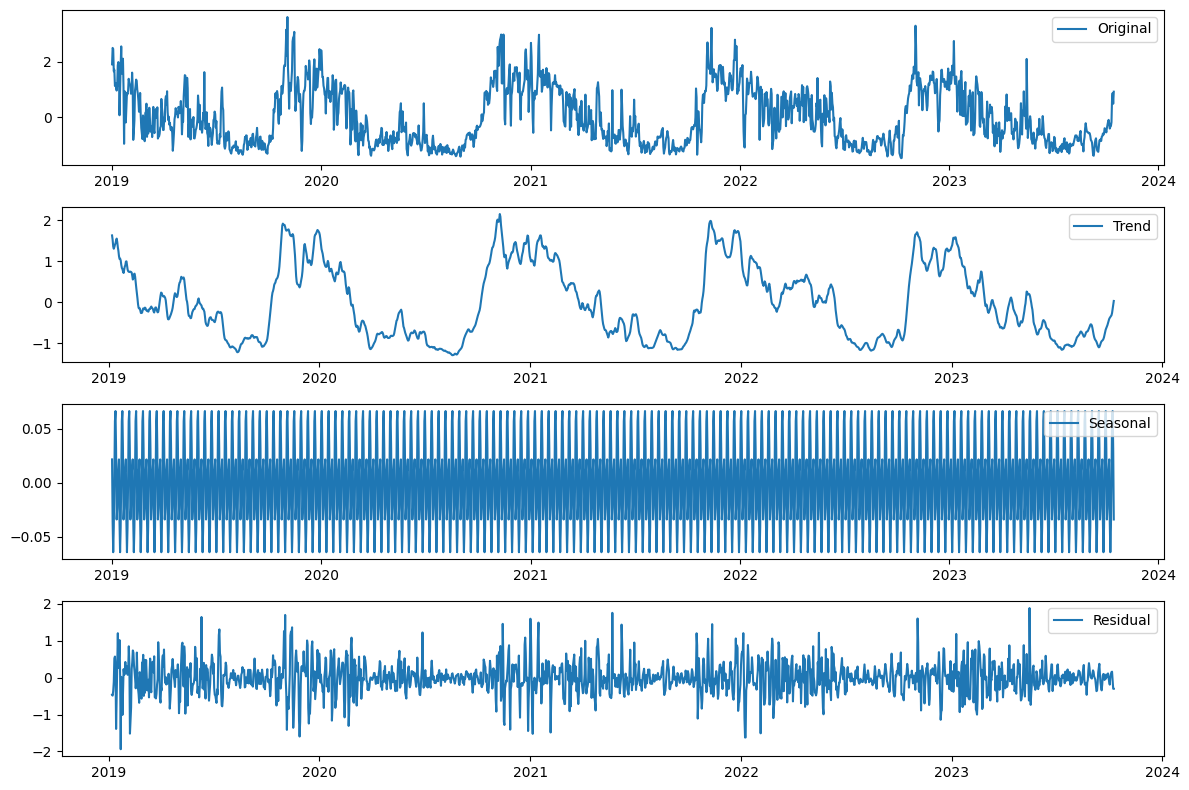

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose



# Perform seasonal decomposition
result = seasonal_decompose(df_delhi['AQI'], model='additive', period=12)
# Replace 'your_period' with the appropriate value if you know the frequency of your data.

# Plot the decomposition results
plt.figure(figsize=(12, 8))

# Original Time Series
plt.subplot(4, 1, 1)
plt.plot(df_delhi['AQI'], label='Original')
plt.legend()

# Trend Component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

# Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

# Residual Component
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Specify the SARIMAX order and seasonal order parameters (adjust as needed)
order = (1, 0, 1)
seasonal_order = (1, 0, 1,4)

In [ ]:
# Create and train the SARIMAX model
sarimax_model = SARIMAX(y_train_D, exog=X_train_D, order=order, seasonal_order=seasonal_order)
result_sarimax = sarimax_model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:

exog_test = X_test_D


In [ ]:
# Make predictions on the test set
forecast_steps = len(y_test_D)
forecast = result_sarimax.get_forecast(steps=forecast_steps, exog=exog_test)


In [ ]:
# Extract the predicted values
predictions = forecast.predicted_mean


In [ ]:
# Evaluate the model
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test_D, predictions)
rmse = np.sqrt(mse)
# Calculate MAE
mae = mean_absolute_error(y_test_D, predictions)
r_squared = r2_score(y_test_D, predictions)


# Display the result
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared (R²): {r_squared}')


Mean Absolute Error (MAE): 0.30674718406378226
Mean Squared Error: 0.13295964698807533
Root Mean Squared Error: 0.364636321542541
R-squared (R²): 0.910505066068941


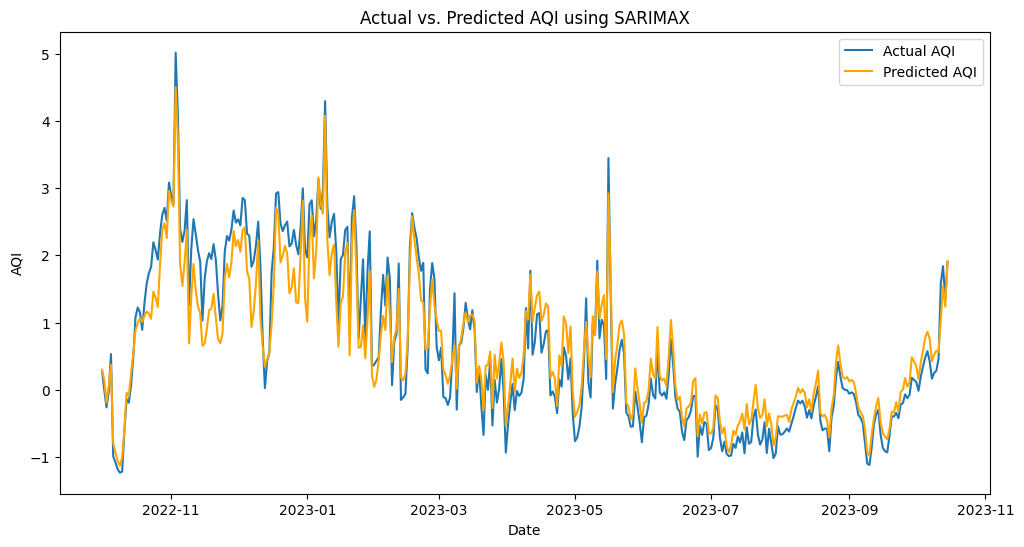

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_D.index, y_test_D, label='Actual AQI')
plt.plot(predictions.index, predictions, label='Predicted AQI', color='Orange')
plt.legend()
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Actual vs. Predicted AQI using SARIMAX')
plt.show()

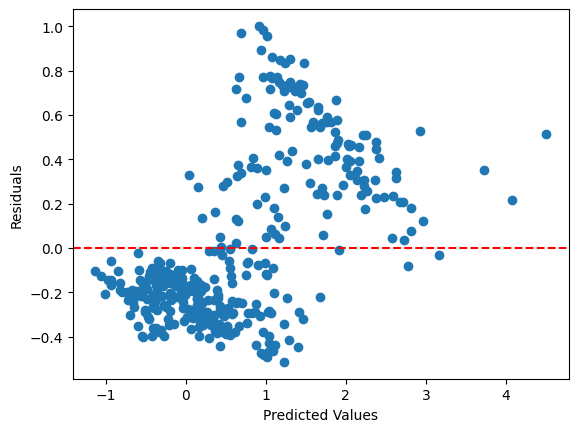

In [ ]:
residuals_rf = y_test_D - predictions
plt.scatter(predictions, residuals_rf)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

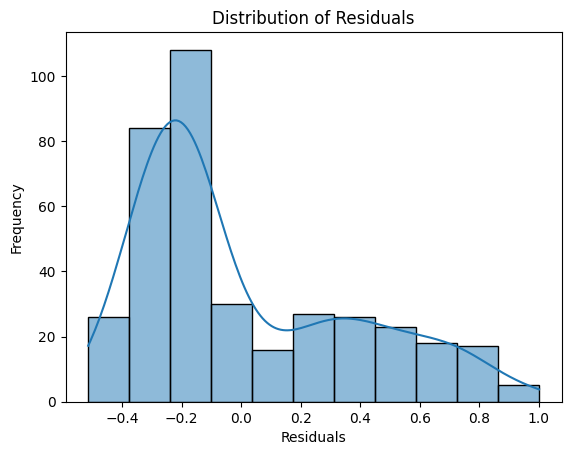

In [ ]:
import seaborn as sns

sns.histplot(residuals_rf, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

**Predictions Dataframe SARIMAX**

In [ ]:
predicted_SARIMAX = pd.DataFrame({'Predicted_AQI': predictions}, index=X_test.index)

# Concatenate one-hot encoded State and City columns to the predicted DataFrame
predicted_SARIMAX = pd.concat([predicted_SARIMAX, X_test.filter(like='State_'), X_test.filter(like='City_')], axis=1)

In [ ]:
# mean_AQI and std_AQI are the mean and standard deviation of the original AQI column
mean_AQI = 142.253383
std_AQI = 91.35

# Reverse the standard scaling to get back the original values
predicted_SARIMAX['Predicted_AQI_Original'] = predicted_SARIMAX['Predicted_AQI'] * std_AQI + mean_AQI


In [ ]:
y_test_df = pd.DataFrame({'Actual_AQI': y_test})
# mean_AQI and std_AQI are the mean and standard deviation of the original AQI column
mean_AQI = 142.253383
std_AQI = 91.35

# Reverse the standard scaling to get back the original values
y_test_df['Actual_AQI'] = y_test_df['Actual_AQI'] * std_AQI + mean_AQI



In [ ]:

predicted_SARIMAX['Original_AQI'] = y_test_df

In [ ]:
# Drop the 'Predicted_AQI' column in-place
predicted_SARIMAX.drop('Predicted_AQI', axis=1, inplace=True)

In [ ]:
predicted_SARIMAX

State_Delhi  State_Haryana  State_Punjab  City_Ambala  \
Recorded_Date                                                          
2022-10-01               0              1             0            0   
2022-10-02               0              1             0            0   
2022-10-03               0              1             0            0   
2022-10-04               0              1             0            0   
2022-10-05               0              1             0            0   
...                    ...            ...           ...          ...   
2023-10-12               0              1             0            0   
2023-10-13               0              1             0            0   
2023-10-14               0              1             0            0   
2023-10-15               0              1             0            0   
2023-10-16               0              1             0            0   

               City_Amritsar  City_Bahadurgarh  City_Ballabgarh  \
Recorded_Date                                                     
2022-10-01                 0                 1                0   
2022-10-02                 0                 1                0   
2022-10-03                 0                 1                0   
2022-10-04                 0                 1                0   
2022-10-05                 0                 1                0   
...                      ...               ...              ...   
2023-10-12                 0                 0                0   
2023-10-13                 0                 0                0   
2023-10-14                 0                 0                0   
2023-10-15                 0                 0                0   
2023-10-16                 0                 0                0   

               City_Bathinda  City_Bhiwani  City_Delhi  ...  \
Recorded_Date                                           ...   
2022-10-01                 0             0           0  ...   
2022-10-02                 0             0           0  ...   
2022-10-03                 0             0           0  ...   
2022-10-04                 0             0           0  ...   
2022-10-05                 0             0           0  ...   
...                      ...           ...         ...  ...   
2023-10-12                 0             0           0  ...   
2023-10-13                 0             0           0  ...   
2023-10-14                 0             0           0  ...   
2023-10-15                 0             0           0  ...   
2023-10-16                 0             0           0  ...   

               City_Kurukshetra   City_Ludhiana  City_Mandikhera  \
Recorded_Date                                                      
2022-10-01                     0              0                0   
2022-10-02                     0              0                0   
2022-10-03                     0              0                0   
2022-10-04                     0              0                0   
2022-10-05                     0              0                0   
...                          ...            ...              ...   
2023-10-12                     0              0                0   
2023-10-13                     0              0                0   
2023-10-14                     0              0                0   
2023-10-15                     0              0                0   
2023-10-16                     0              0                0   

               City_Manesar  City_Palwal  City_Rupnagar  City_Sirsa  \
Recorded_Date                                                         
2022-10-01                0            0              0           0   
2022-10-02                0            0              0           0   
2022-10-03                0            0              0           0   
2022-10-04                0            0              0           0   
2022-10-05                0            0              0           0   
... 

In [ ]:


state_columns = ['State_Delhi', 'State_Haryana', 'State_Punjab']
city_columns = ['City_Ambala', 'City_Amritsar', 'City_Bahadurgarh', 'City_Ballabgarh', 'City_Bathinda', 'City_Bhiwani', 'City_Delhi', 'City_Dharuhera', 'City_Fatehabad', 'City_Hisar', 'City_Jalandhar', 'City_Jind', 'City_Karnal', 'City_Khanna', 'City_Kurukshetra ', 'City_Ludhiana', 'City_Mandikhera', 'City_Manesar', 'City_Palwal', 'City_Rupnagar', 'City_Sirsa', 'City_Yamuna Nagar']

# Reverse one-hot encoding for 'State' and 'City'
predicted_SARIMAX['Reconstructed_State'] = predicted_SARIMAX[state_columns].idxmax(axis=1).str.replace('State_', '')
predicted_SARIMAX['Reconstructed_City'] = predicted_SARIMAX[city_columns].idxmax(axis=1).str.replace('City_', '')

# Drop the one-hot encoded columns
predicted_SARIMAX.drop(columns=state_columns + city_columns, inplace=True)

# Display the resulting DataFrame
predicted_SARIMAX


Predicted_AQI_Original  Original_AQI Reconstructed_State  \
Recorded_Date                                                             
2022-10-01                 169.250164    176.832082             Haryana   
2022-10-02                 155.678915    144.499919             Haryana   
2022-10-03                 124.499498     93.051781             Haryana   
2022-10-04                 148.146062    108.421225             Haryana   
2022-10-05                 176.141664    132.733678             Haryana   
...                               ...           ...                 ...   
2023-10-12                 237.478185    116.640927             Haryana   
2023-10-13                 283.660768    118.700853             Haryana   
2023-10-14                 255.234934    110.247825             Haryana   
2023-10-15                 316.956189    101.348147             Haryana   
2023-10-16                        NaN     96.301663             Haryana   

              Reconstructed_City  
Recorded_Date                     
2022-10-01           Bahadurgarh  
2022-10-02           Bahadurgarh  
2022-10-03           Bahadurgarh  
2022-10-04           Bahadurgarh  
2022-10-05           Bahadurgarh  
...                          ...  
2023-10-12                 Hisar  
2023-10-13                 Hisar  
2023-10-14                 Hisar  
2023-10-15                 Hisar  
2023-10-16                 Hisar  

[8159 rows x 4 columns]

In [ ]:
predicted_SARIMAX.to_excel('PredictedVSactual_SARIMAX.xlsx')

# LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

target_column = 'AQI'

# Separating the target column and independent columns
X = Air_Pollutants.drop(target_column, axis=1)  # Assuming other columns are independent variables
y = Air_Pollutants[target_column]

# Scale the independent variables (X)
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Scale the target variable (y)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Define the sequence length (number of time steps)
sequence_length = 10  # You mentioned using 10 columns for prediction

# Function to create sequences for LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i : i + sequence_length]
        sequences.append(sequence)
    return np.array(sequences)

# Creating sequences for LSTM model
X_sequences = create_sequences(X_scaled, sequence_length)
y_sequences = y_scaled[sequence_length:]

# Splitting data into training and testing sets
train_size = int(len(X_sequences) * 0.8)
X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, X.shape[1])))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Predict CO2 emissions
predictions = model.predict(X_test)



Epoch 1/50
957/957 [==============================] - 19s 16ms/step - loss: 0.0065 - val_loss: 0.0070
Epoch 2/50
957/957 [==============================] - 15s 16ms/step - loss: 0.0048 - val_loss: 0.0065
Epoch 3/50
957/957 [==============================] - 14s 15ms/step - loss: 0.0046 - val_loss: 0.0064
Epoch 4/50
957/957 [==============================] - 14s 15ms/step - loss: 0.0045 - val_loss: 0.0058
Epoch 5/50
957/957 [==============================] - 14s 14ms/step - loss: 0.0045 - val_loss: 0.0052
Epoch 6/50
957/957 [==============================] - 14s 15ms/step - loss: 0.0045 - val_loss: 0.0053
Epoch 7/50
957/957 [==============================] - 14s 15ms/step - loss: 0.0044 - val_loss: 0.0073
Epoch 8/50
957/957 [==============================] - 14s 15ms/step - loss: 0.0044 - val_loss: 0.0057
Epoch 9/50
957/957 [==============================] - 16s 16ms/step - loss: 0.0043 - val_loss: 0.0061
Epoch 10/50
957/957 [==============================] - 14s 15ms/step - loss: 0.004

Mean Absolute Error (MAE): 0.05320933607837188
Mean Squared Error (MSE): 0.005523754909323885
Root Mean Squared Error (RMSE): 0.07432196787844011
R-squared (R2 score): 0.678795762910378


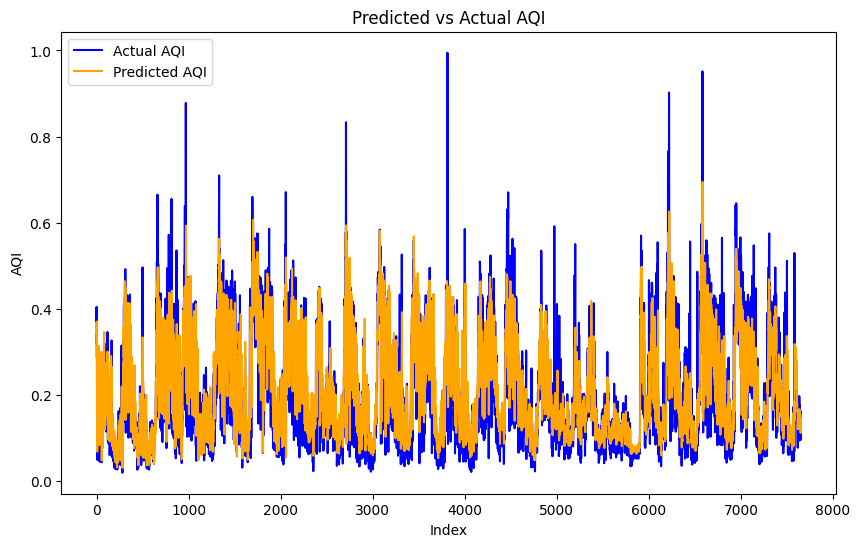

In [ ]:
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# Inverse transform the predicted values and actual test values
#predicted_values = scaler_y.inverse_transform(predictions)
#actual_values = scaler_y.inverse_transform(y_test)

# Calculate Mean Absolute Error (MAE) and Mean Squared Error (MSE)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 score): {r2}")

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual AQI', color='blue')
plt.plot(predictions, label='Predicted AQI', color='orange')
plt.xlabel('Index')
plt.ylabel('AQI')
plt.title('Predicted vs Actual AQI')
plt.legend()
plt.show()


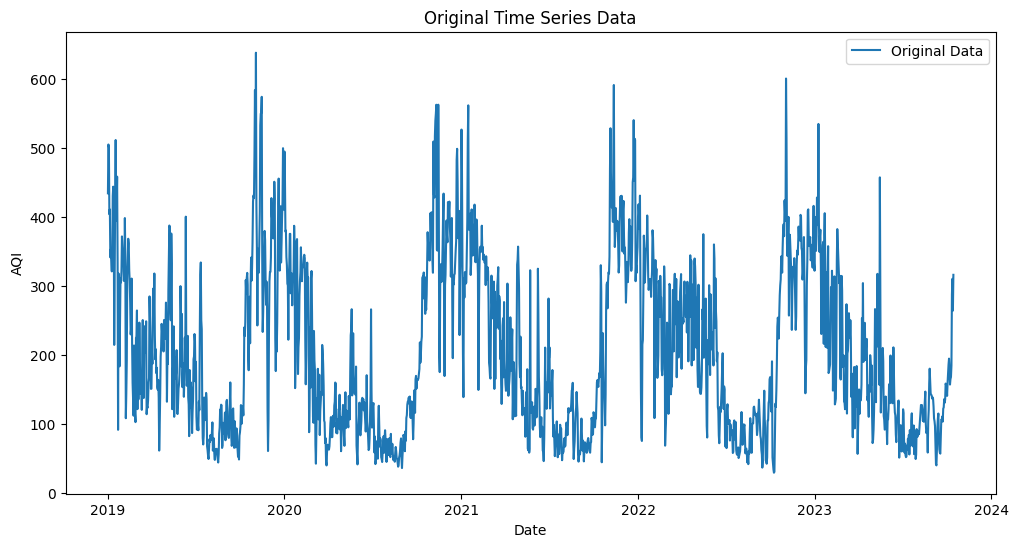

ADF Test p-value:  0.021804269330734375
Data is stationary


In [ ]:

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Plot the original time series data
plt.figure(figsize=(12, 6))
plt.plot(df_delhi['AQI'], label='Original Data')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Original Time Series Data')
plt.legend()
plt.show()

# Function to check for stationarity using the Augmented Dickey-Fuller test
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    p_value = result[1]
    print("ADF Test p-value: ", p_value)
    if p_value <= 0.05:
        print("Data is stationary")
    else:
        print("Data is not stationary")

# Check stationarity of the original data
check_stationarity(df_delhi['AQI'])




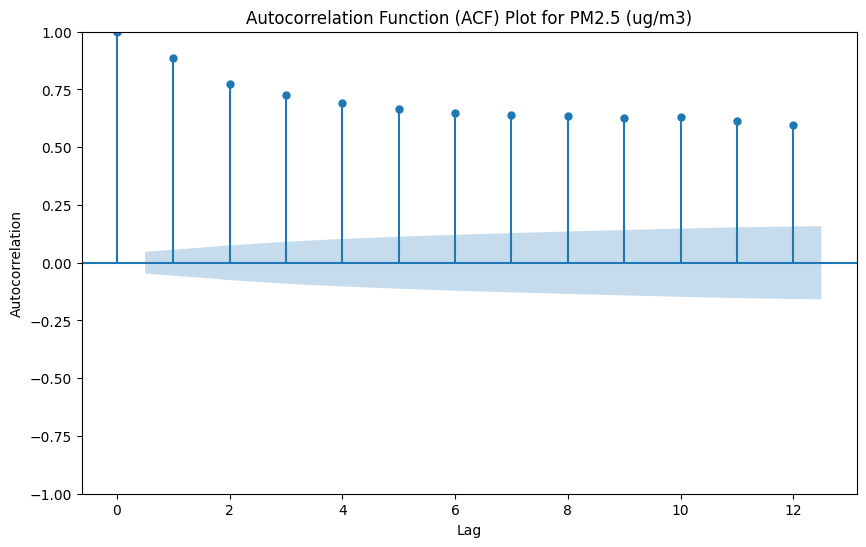

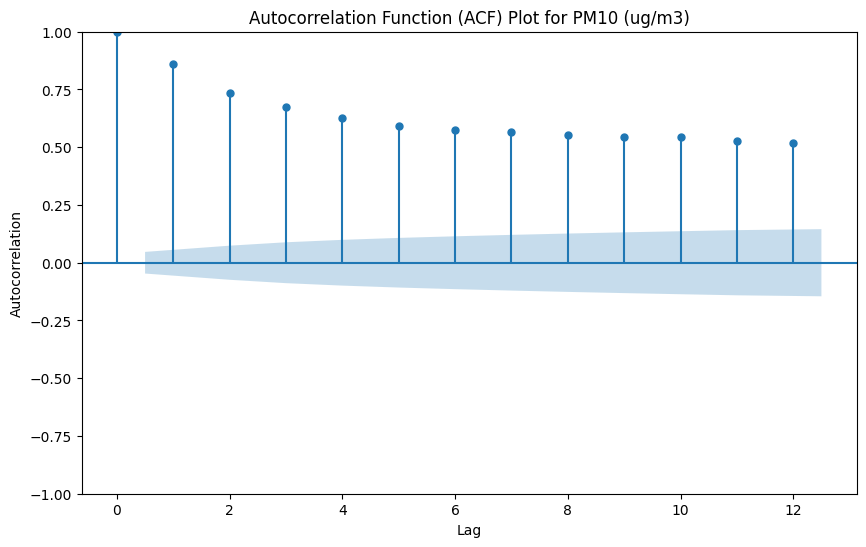

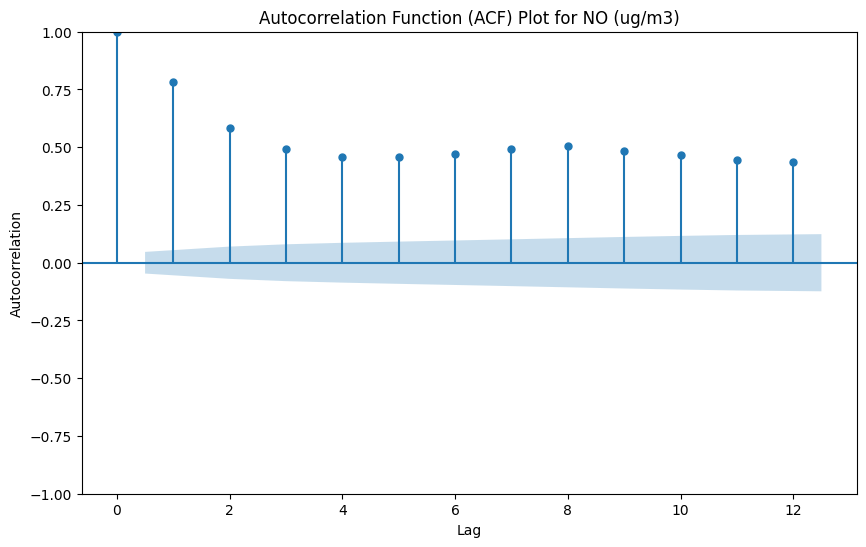

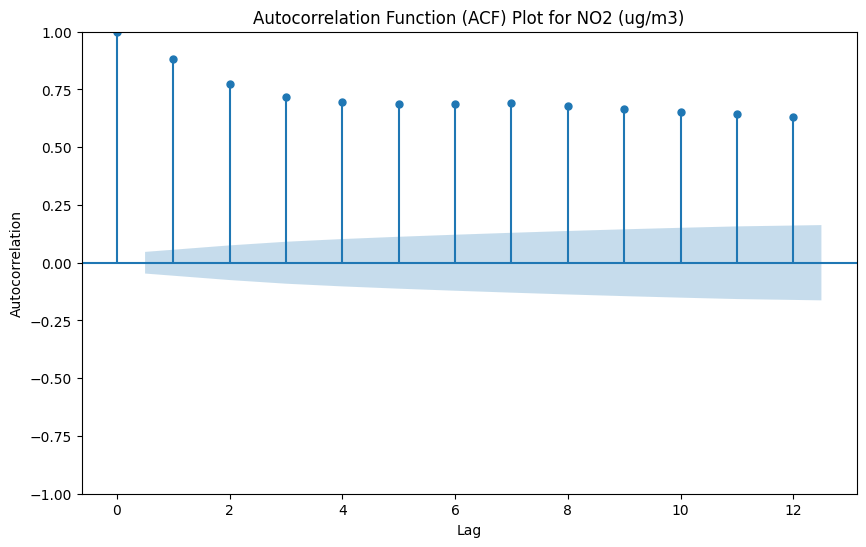

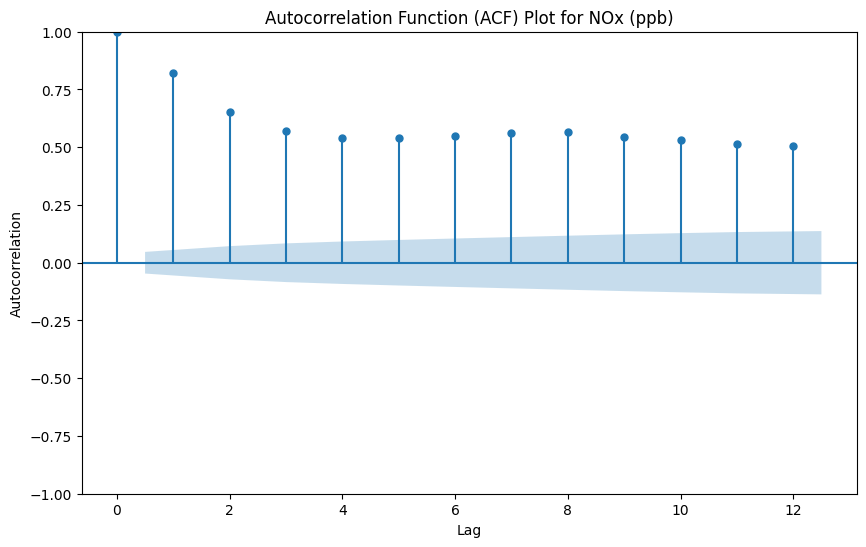

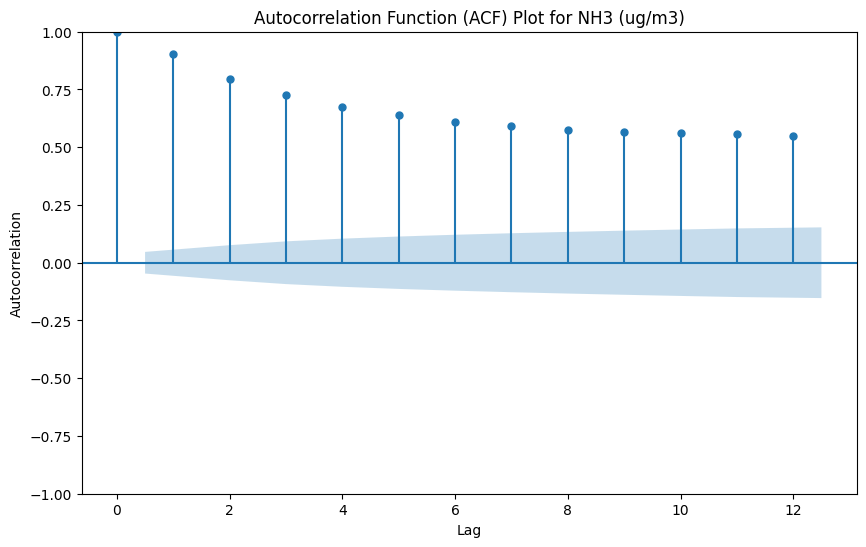

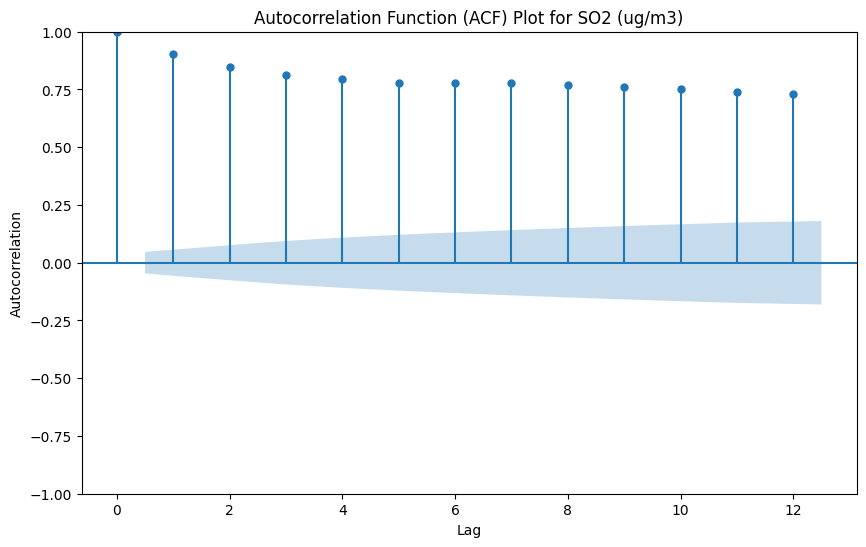

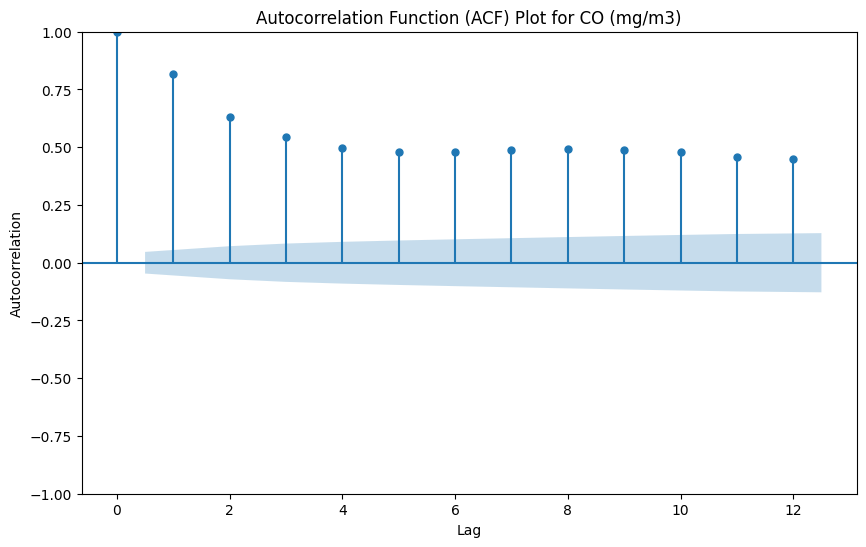

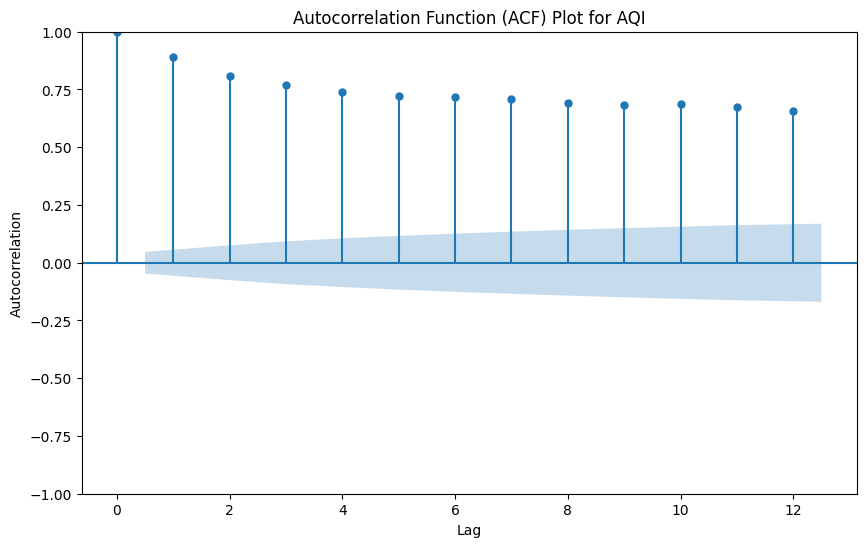

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Select the first 9 numeric columns for analysis
columns_to_analyze = df_delhi.iloc[:, 0:9].columns

# Plot ACF for each selected column
for column_to_analyze in columns_to_analyze:
    fig, ax = plt.subplots(figsize=(10, 6))
    sm.graphics.tsa.plot_acf(df_delhi[column_to_analyze], lags=12, ax=ax)
    plt.title(f'Autocorrelation Function (ACF) Plot for {column_to_analyze}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.show()



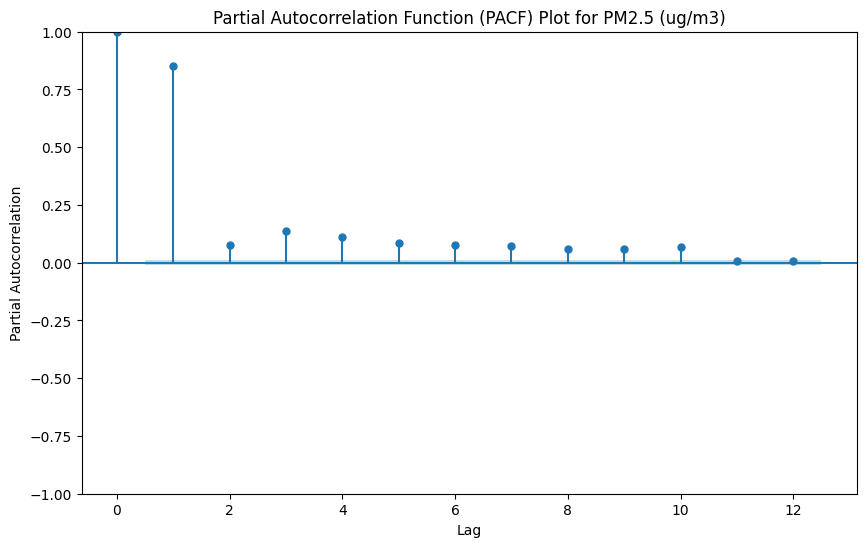

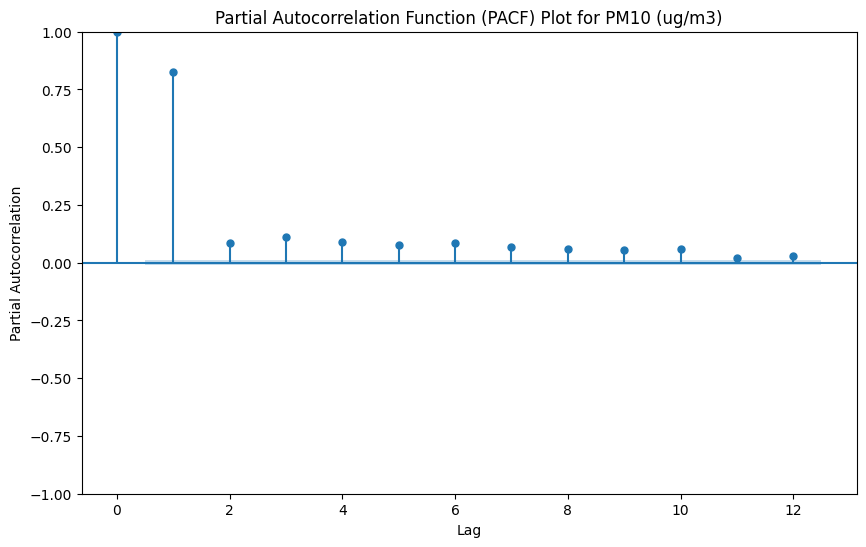

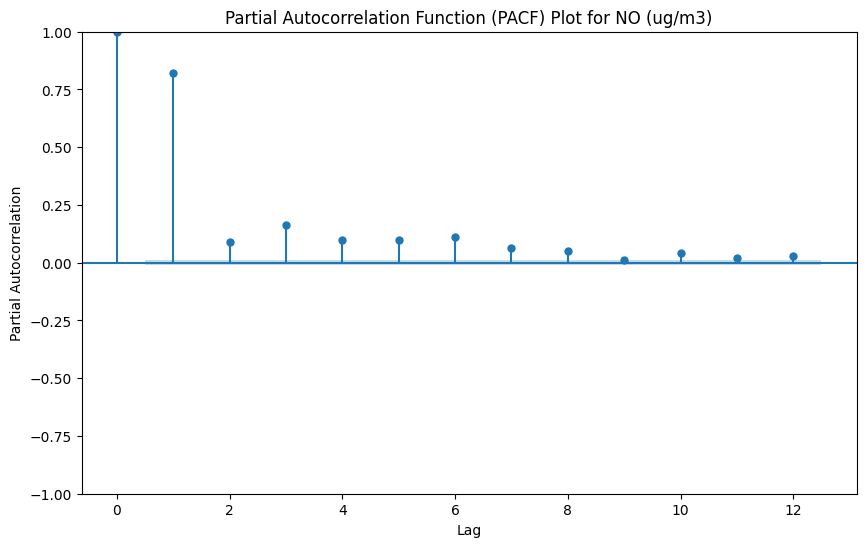

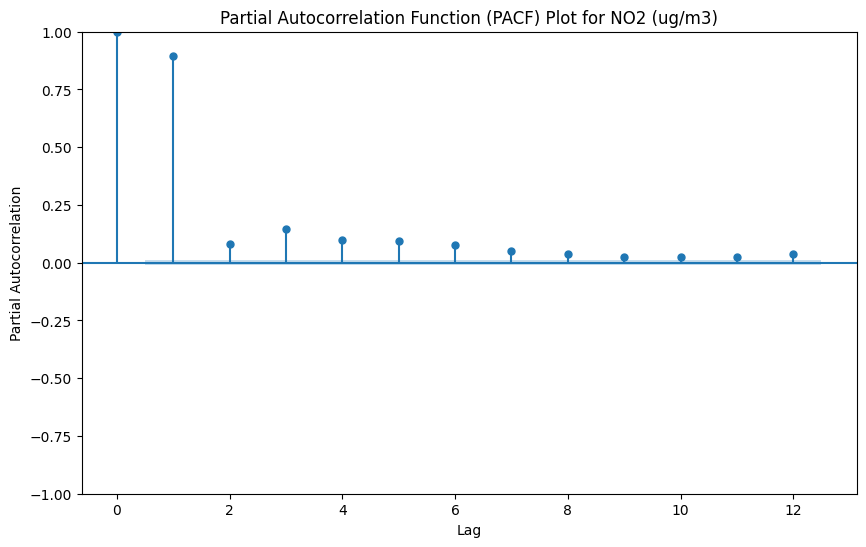

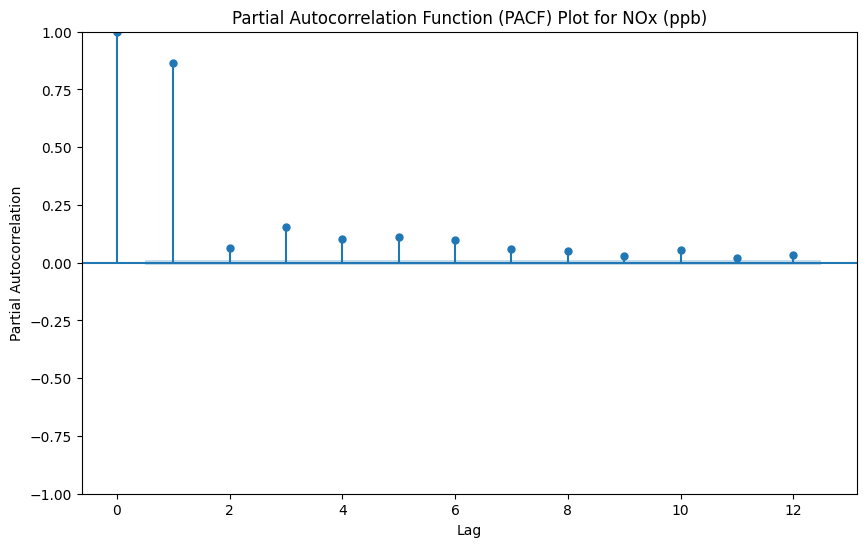

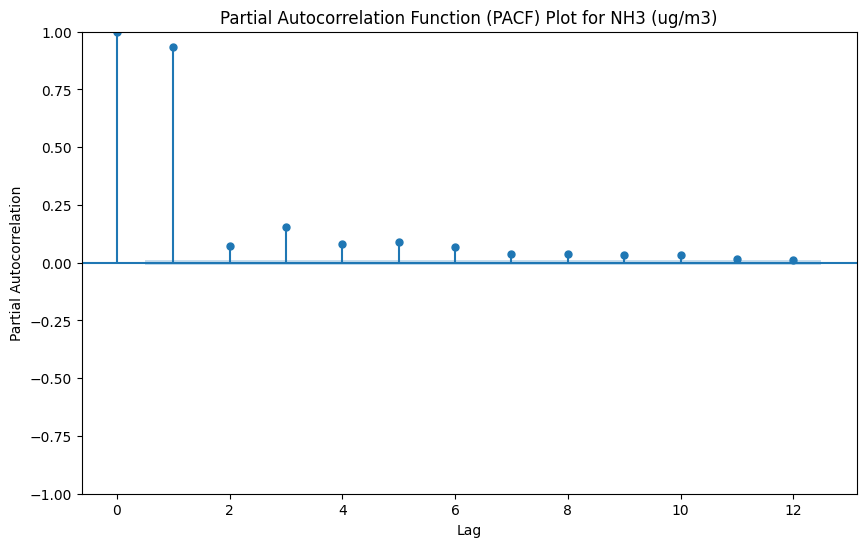

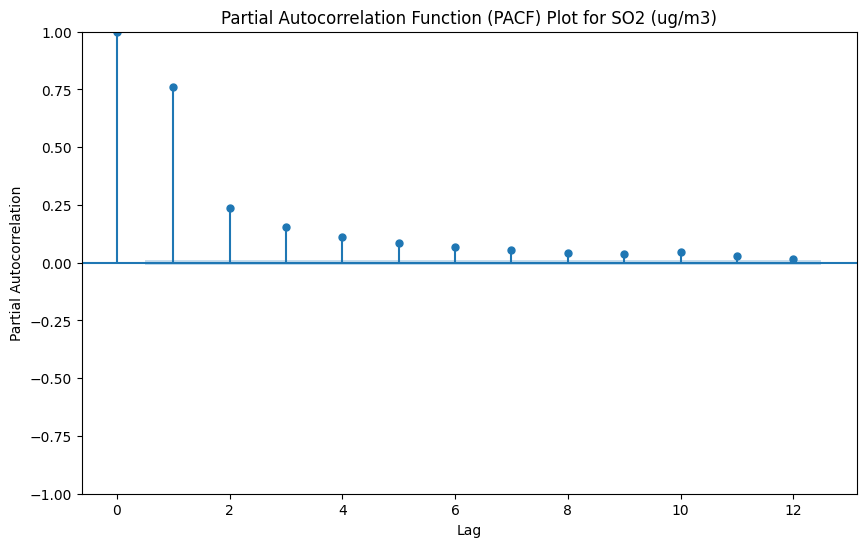

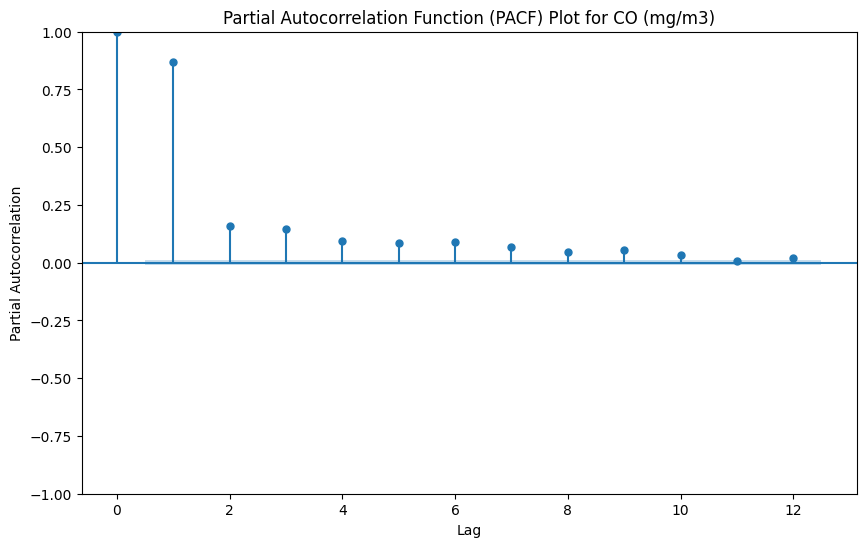

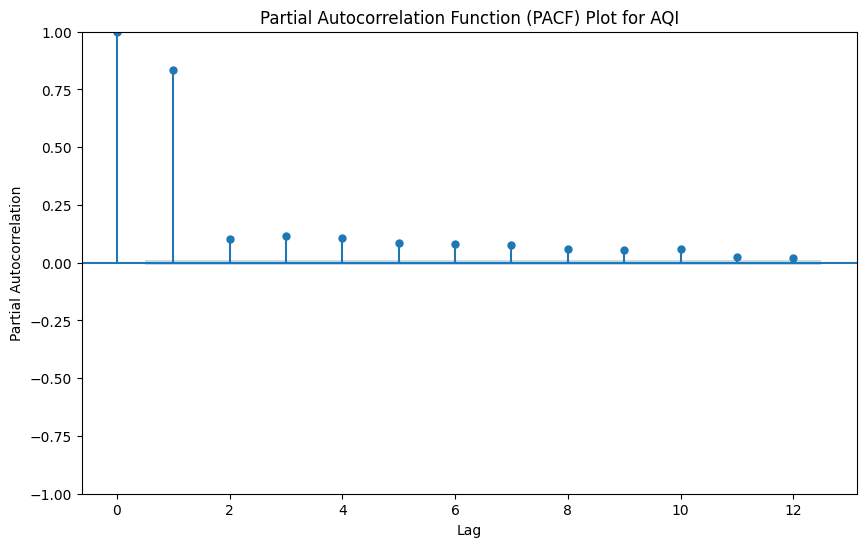

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Select the first 9 numeric columns for analysis
columns_to_analyze = df_delhi.iloc[:, 0:9].columns

# Plot PACF for each selected column
for column_to_analyze in columns_to_analyze:
    fig, ax = plt.subplots(figsize=(10, 6))
    sm.graphics.tsa.plot_pacf(Air_Pollutants[column_to_analyze], lags=12, ax=ax)
    plt.title(f'Partial Autocorrelation Function (PACF) Plot for {column_to_analyze}')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.show()
